The function relplot() is named that way because it is designed to visualize many different statistical relationships. While scatter plots are often effective, relationships where one variable represents a measure of time are better represented by a line. The relplot() function has a convenient kind parameter that lets you easily switch to this alternate representation:

In [ ]:
import pandas as pd
# Import seaborn
import seaborn as sns


In [ ]:
# Load an example dataset
tips = sns.load_dataset("tips")

In [12]:
tips_ds = pd.DataFrame(tips)
tips_ds.head()

total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4

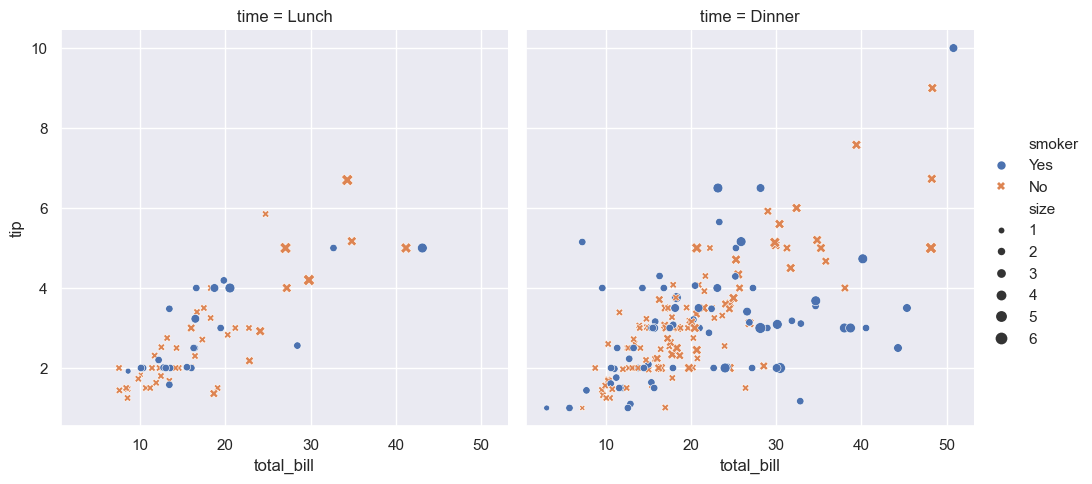

In [ ]:

# Apply the default theme
sns.set_theme()

# Create a visualization
sns.relplot(
    data=tips,
    x="total_bill", y="tip", col="time",
    hue="smoker", style="smoker", size="size",
)

In [ ]:
dots = sns.load_dataset("dots")

In [13]:
dots_ds = pd.DataFrame(dots)
dots_ds.head()

align choice  time  coherence  firing_rate
0  dots     T1   -80        0.0    33.189967
1  dots     T1   -80        3.2    31.691726
2  dots     T1   -80        6.4    34.279840
3  dots     T1   -80       12.8    32.631874
4  dots     T1   -80       25.6    35.060487

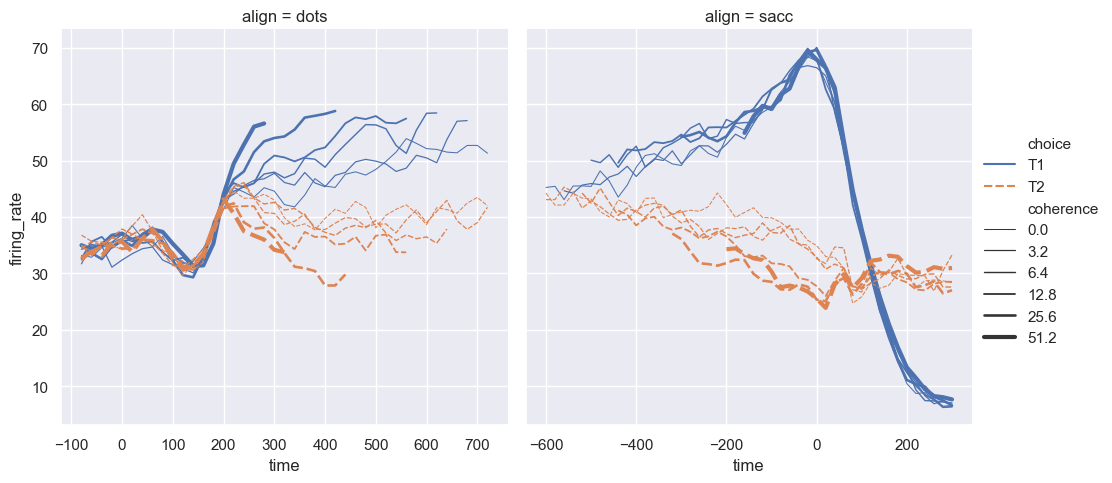

In [ ]:

sns.relplot(
    data=dots, kind="line",
    x="time", y="firing_rate", col="align",
    hue="choice", size="coherence", style="choice",
    facet_kws=dict(sharex=False),
)

In [ ]:
fmri = sns.load_dataset("fmri")

In [14]:
fmri_ds = pd.DataFrame(fmri)
fmri_ds.head()

subject  timepoint event    region    signal
0     s13         18  stim  parietal -0.017552
1      s5         14  stim  parietal -0.080883
2     s12         18  stim  parietal -0.081033
3     s11         18  stim  parietal -0.046134
4     s10         18  stim  parietal -0.037970

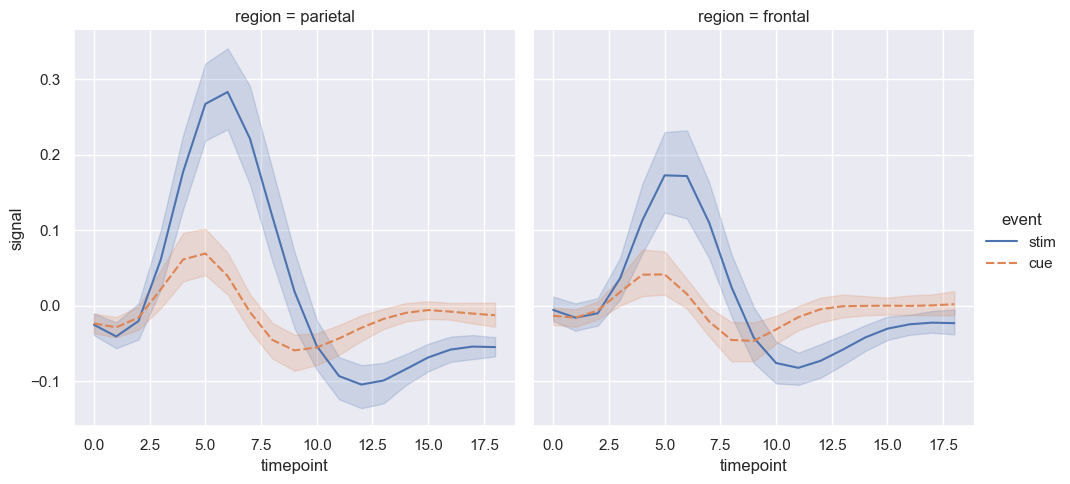

In [ ]:

sns.relplot(
    data=fmri, kind="line",
    x="timepoint", y="signal", col="region",
    hue="event", style="event",
)

When statistical values are estimated, seaborn will use bootstrapping to compute confidence intervals and draw error bars representing the uncertainty of the estimate.

Statistical estimation in seaborn goes beyond descriptive statistics. For example, it is possible to enhance a scatterplot by including a linear regression model (and its uncertainty) using lmplot():

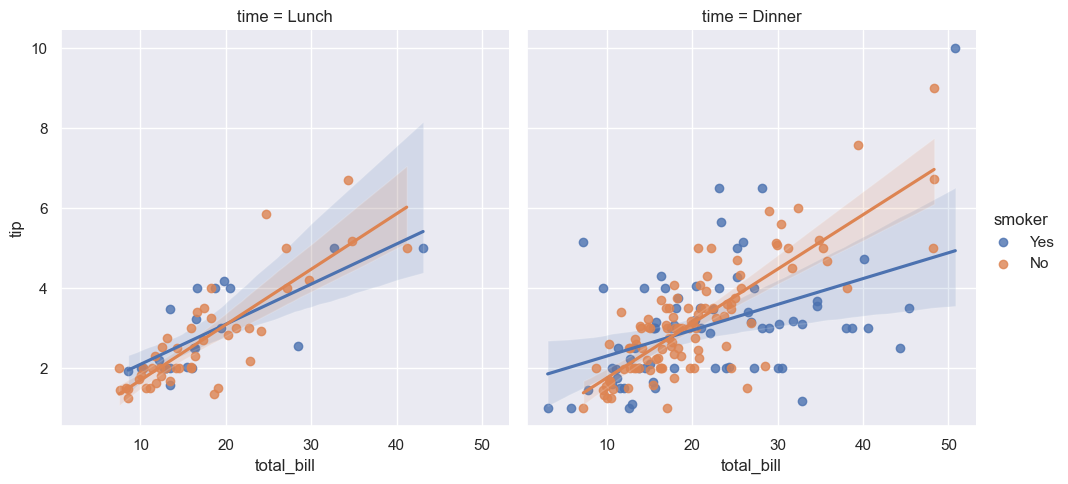

In [5]:
sns.lmplot(data=tips, x="total_bill", y="tip", col="time", hue="smoker")

These include classic techniques like histograms and computationally-intensive approaches like kernel density estimation:

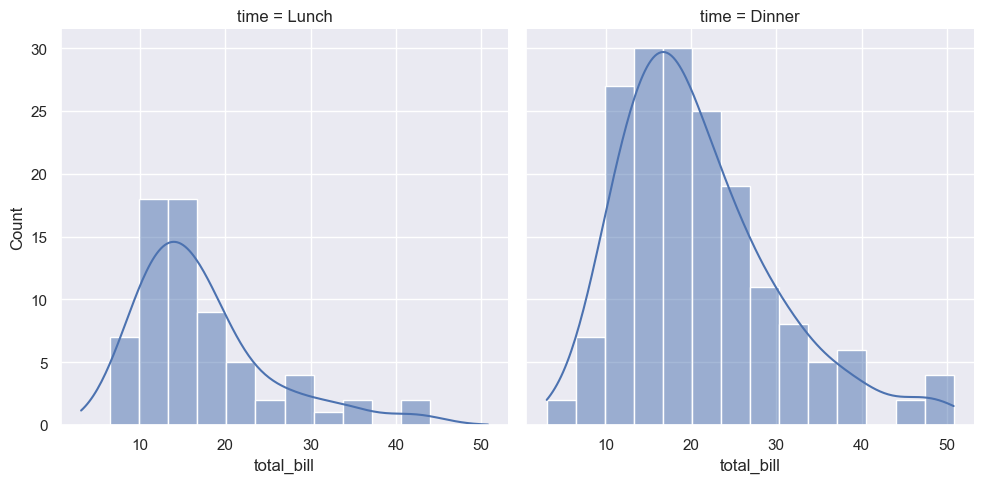

In [6]:
sns.displot(data=tips, x="total_bill", col="time", kde=True)

Seaborn also tries to promote techniques that are powerful but less familiar, such as calculating and plotting the empirical cumulative distribution function of the data:

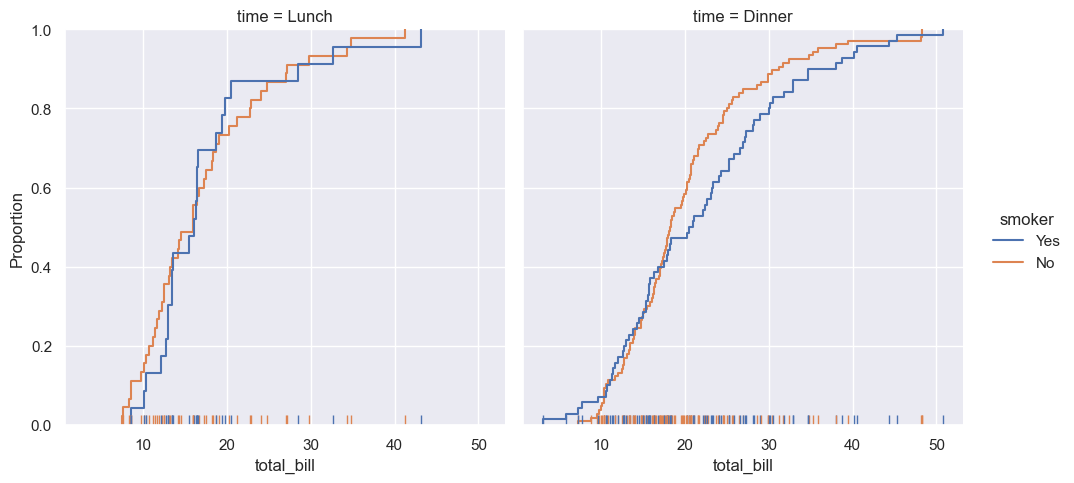

In [7]:
sns.displot(data=tips, kind="ecdf", x="total_bill", col="time", hue="smoker", rug=True)

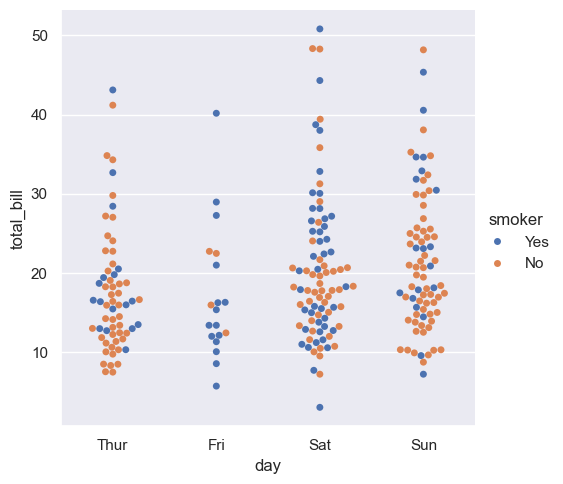

In [8]:
sns.catplot(data=tips, kind="swarm", x="day", y="total_bill", hue="smoker")

lternately, you could use kernel density estimation to represent the underlying distribution that the points are sampled fro

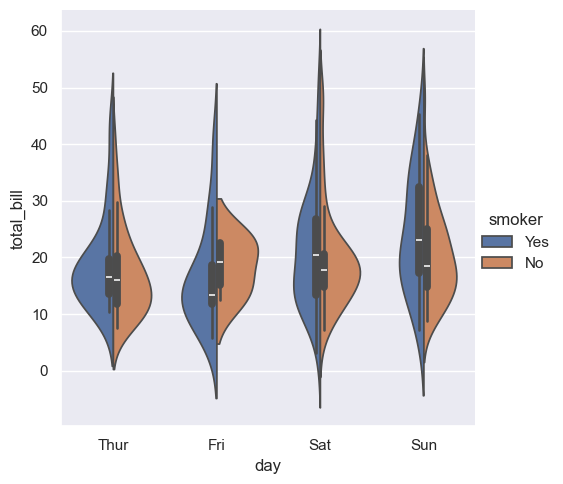

In [15]:
sns.catplot(data=tips, kind="violin", x="day", y="total_bill", hue="smoker", split=True)

Or you could show only the mean value and its confidence interval within each nested category:

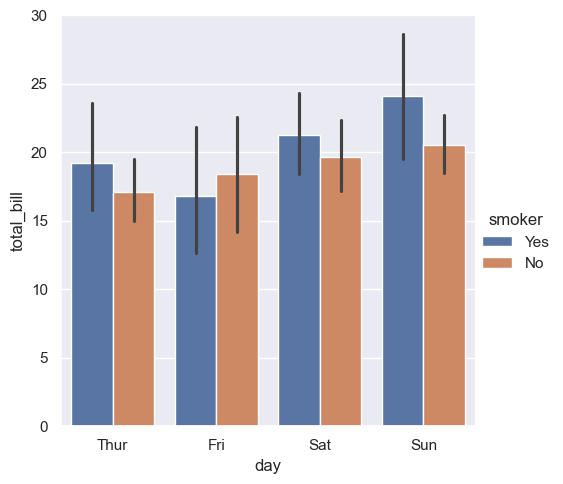

In [16]:
sns.catplot(data=tips, kind="bar", x="day", y="total_bill", hue="smoker")

Some seaborn functions combine multiple kinds of plots to quickly give informative summaries of a dataset. One, jointplot(), focuses on a single relationship. It plots the joint distribution between two variables along with each variable’s marginal distribution:

In [17]:
penguins = sns.load_dataset("penguins")
print(penguins.head())

  species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0  Adelie  Torgersen            39.1           18.7              181.0   
1  Adelie  Torgersen            39.5           17.4              186.0   
2  Adelie  Torgersen            40.3           18.0              195.0   
3  Adelie  Torgersen             NaN            NaN                NaN   
4  Adelie  Torgersen            36.7           19.3              193.0   

   body_mass_g     sex  
0       3750.0    Male  
1       3800.0  Female  
2       3250.0  Female  
3          NaN     NaN  
4       3450.0  Female  


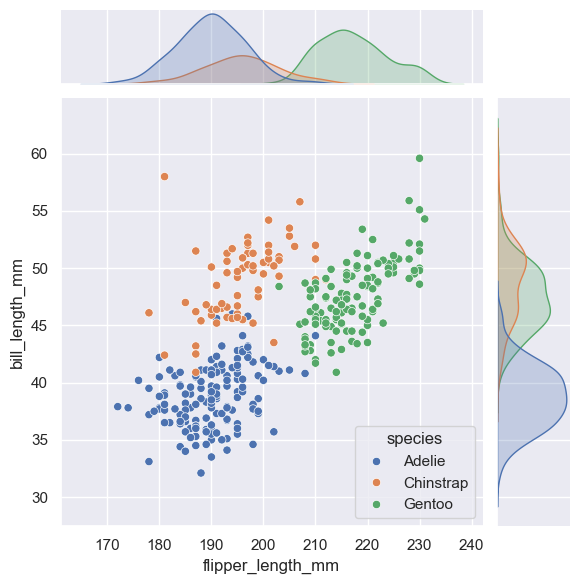

In [ ]:
sns.jointplot(data=penguins, x="flipper_length_mm", y="bill_length_mm", hue="species")

he other, pairplot(), takes a broader view: it shows joint and marginal distributions for all pairwise relationships and for each variable, respectively

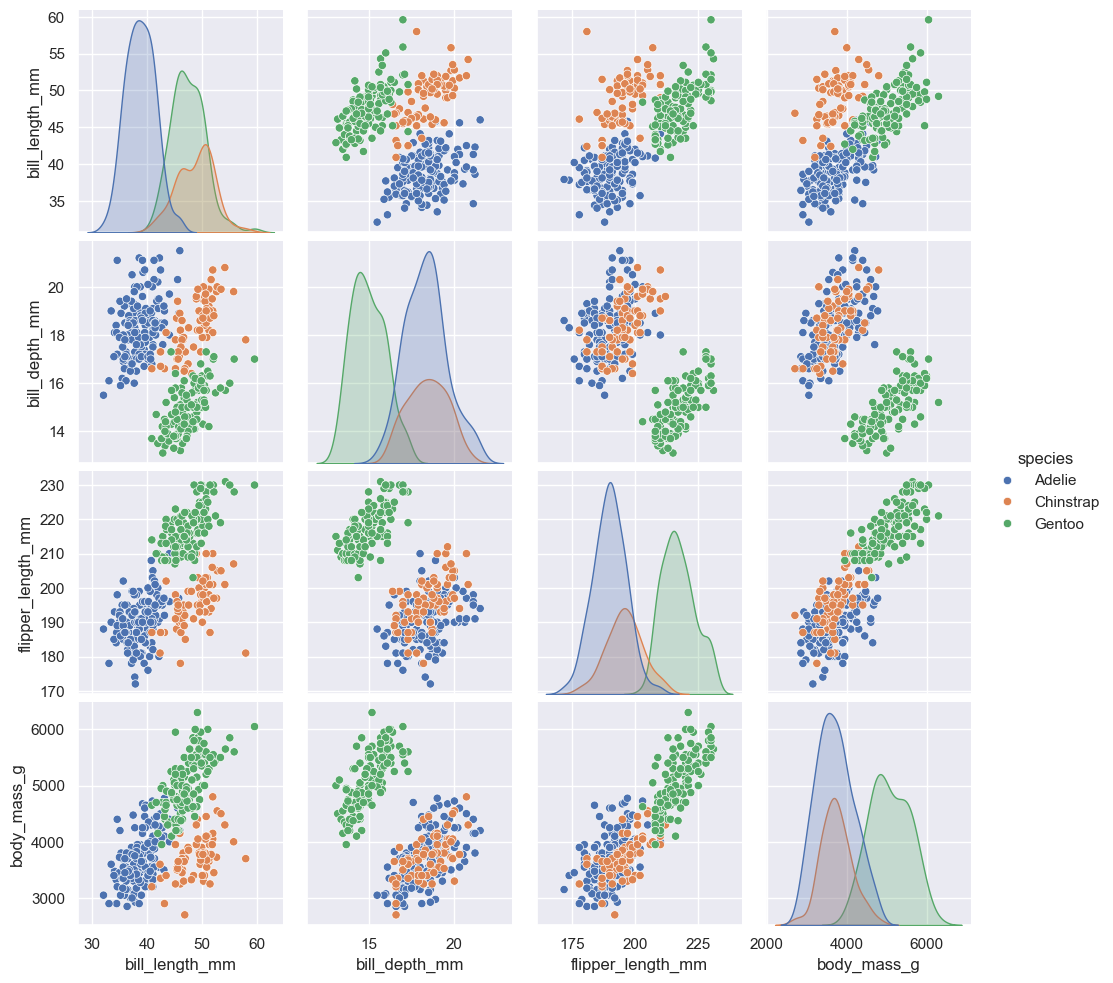

In [19]:
sns.pairplot(data=penguins, hue="species")

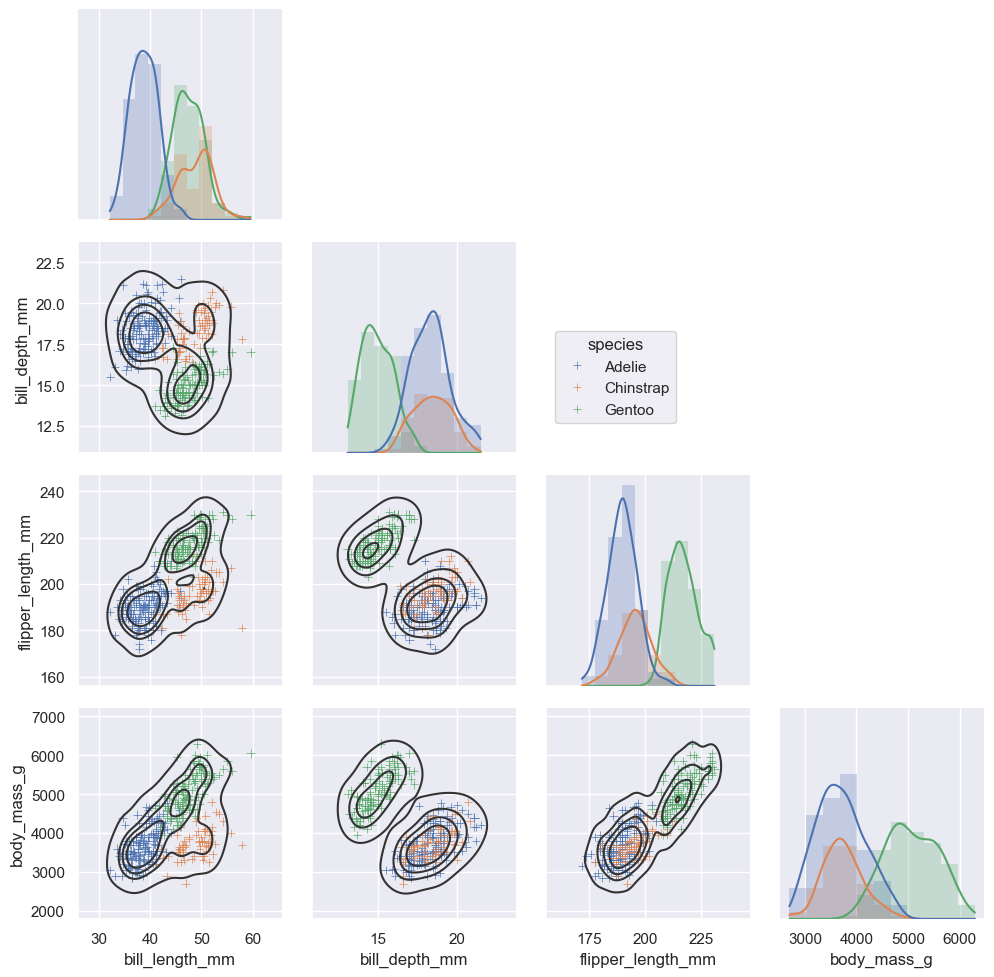

In [20]:
g = sns.PairGrid(penguins, hue="species", corner=True)
g.map_lower(sns.kdeplot, hue=None, levels=5, color=".2")
g.map_lower(sns.scatterplot, marker="+")
g.map_diag(sns.histplot, element="step", linewidth=0, kde=True)
g.add_legend(frameon=True)
g.legend.set_bbox_to_anchor((.61, .6))

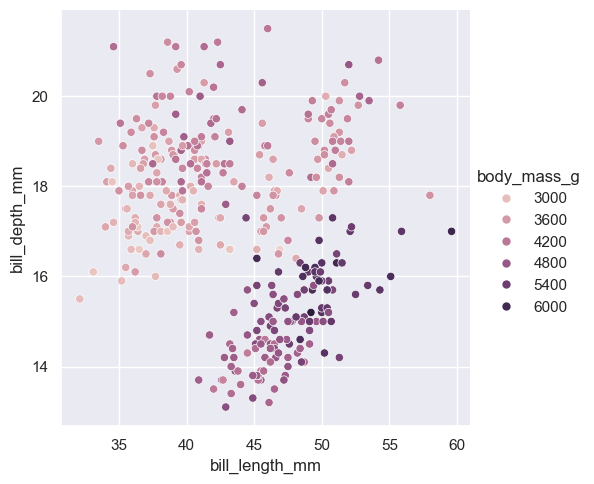

In [21]:
sns.relplot(
    data=penguins,
    x="bill_length_mm", y="bill_depth_mm", hue="body_mass_g"
)

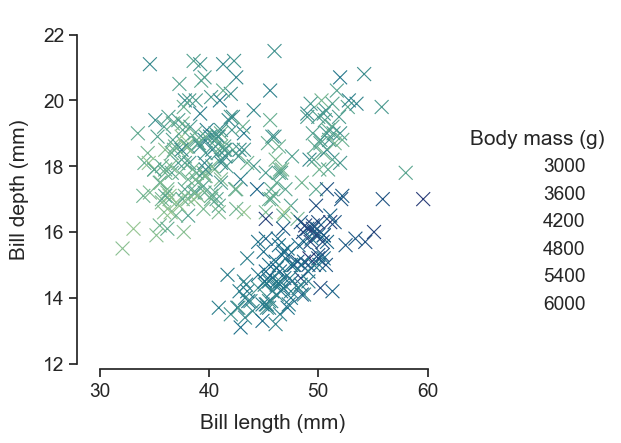

In [22]:
sns.set_theme(style="ticks", font_scale=1.25)
g = sns.relplot(
    data=penguins,
    x="bill_length_mm", y="bill_depth_mm", hue="body_mass_g",
    palette="crest", marker="x", s=100,
)
g.set_axis_labels("Bill length (mm)", "Bill depth (mm)", labelpad=10)
g.legend.set_title("Body mass (g)")
g.figure.set_size_inches(6.5, 4.5)
g.ax.margins(.15)
g.despine(trim=True)

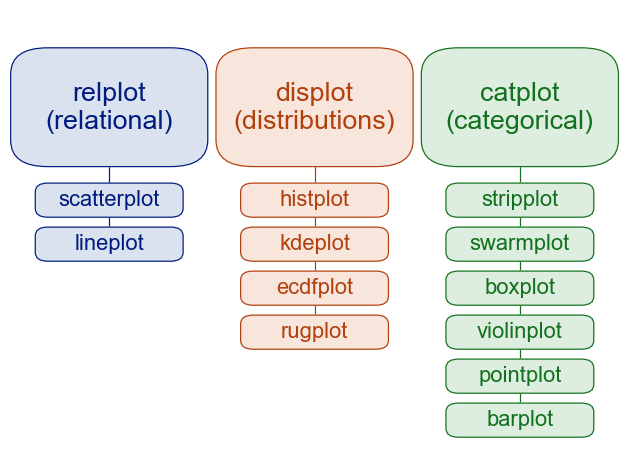

<Axes: xlabel='flipper_length_mm', ylabel='Count'>

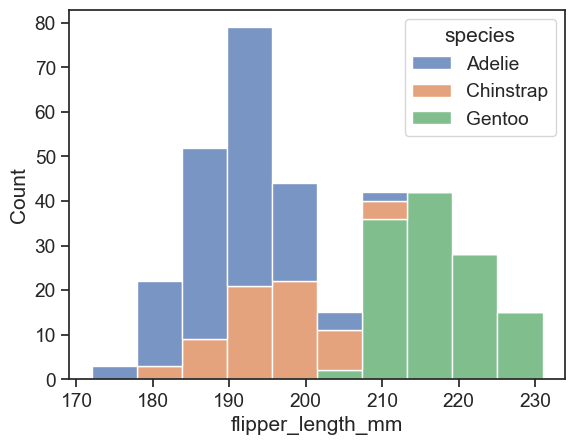

In [23]:
penguins = sns.load_dataset("penguins")
sns.histplot(data=penguins, x="flipper_length_mm", hue="species", multiple="stack")

<Axes: xlabel='flipper_length_mm', ylabel='Density'>

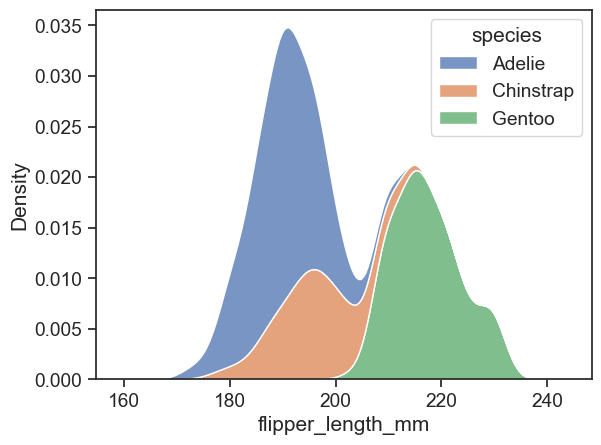

In [24]:
sns.kdeplot(data=penguins, x="flipper_length_mm", hue="species", multiple="stack")

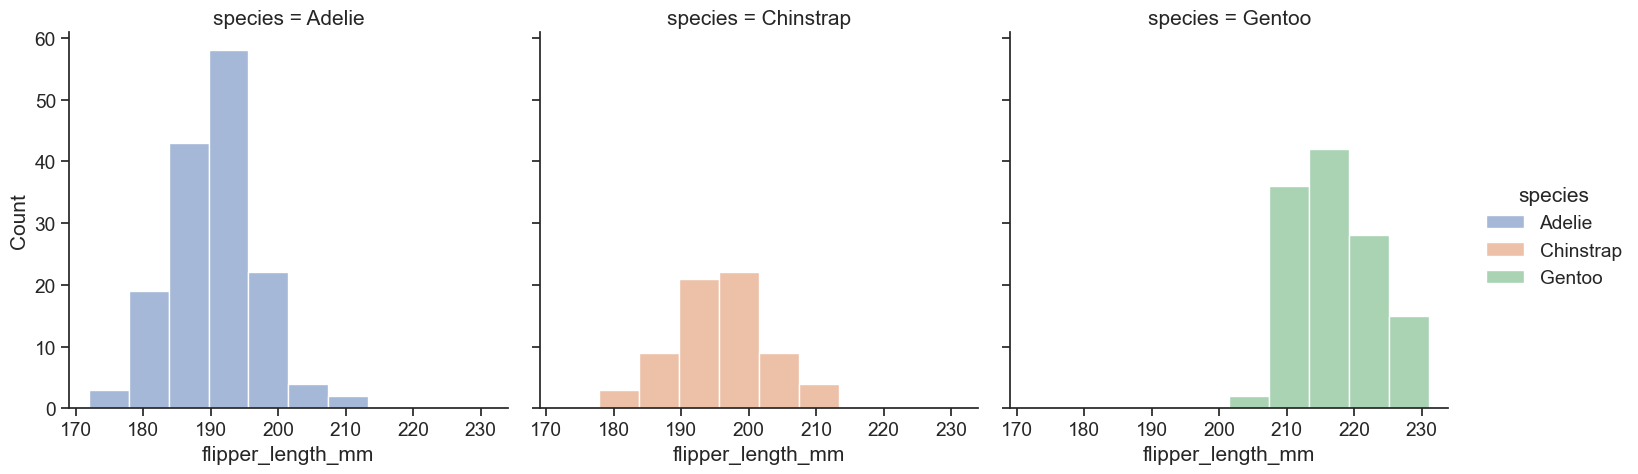

In [25]:
sns.displot(data=penguins, x="flipper_length_mm", hue="species", col="species")

In [26]:
import matplotlib.pyplot as plt

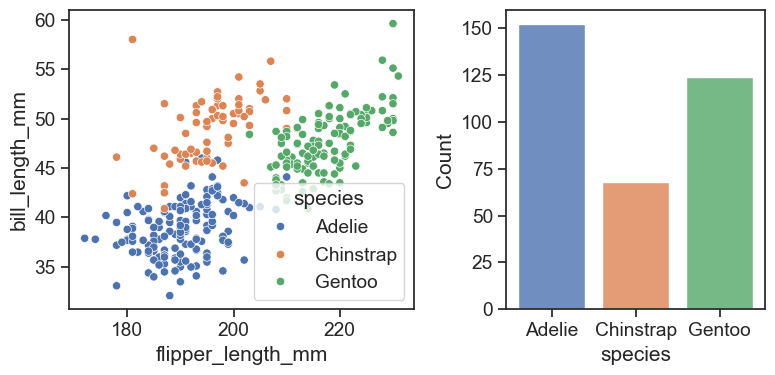

In [27]:
f, axs = plt.subplots(1, 2, figsize=(8, 4), gridspec_kw=dict(width_ratios=[4, 3]))
sns.scatterplot(data=penguins, x="flipper_length_mm", y="bill_length_mm", hue="species", ax=axs[0])
sns.histplot(data=penguins, x="species", hue="species", shrink=.8, alpha=.8, legend=False, ax=axs[1])
f.tight_layout()

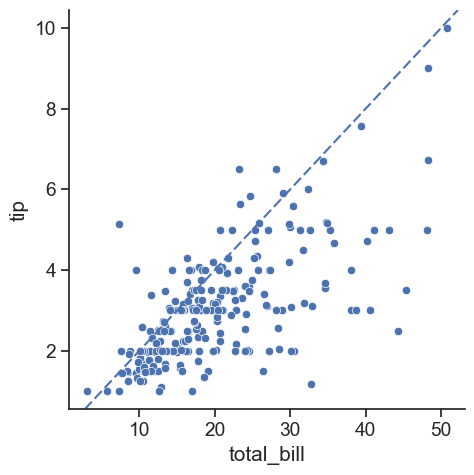

In [28]:
tips = sns.load_dataset("tips")
g = sns.relplot(data=tips, x="total_bill", y="tip")
g.ax.axline(xy1=(10, 2), slope=.2, color="b", dashes=(5, 2))

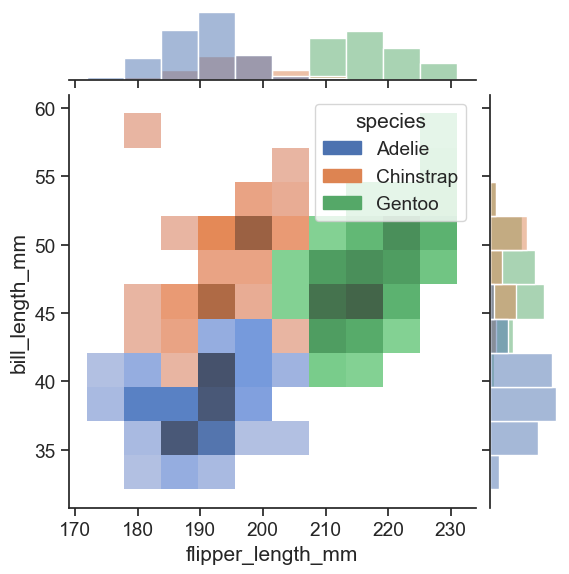

In [29]:
sns.jointplot(data=penguins, x="flipper_length_mm", y="bill_length_mm", hue="species", kind="hist")

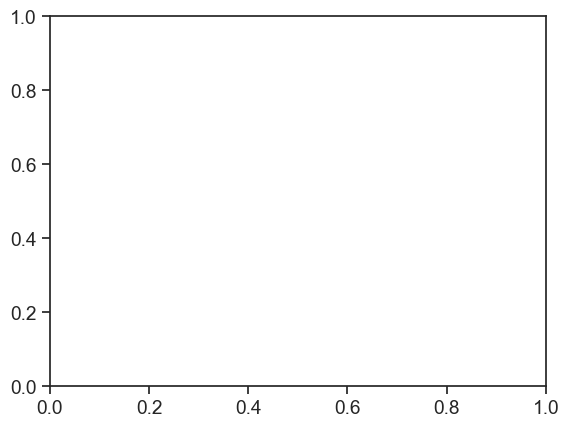

In [30]:
f, ax = plt.subplots()

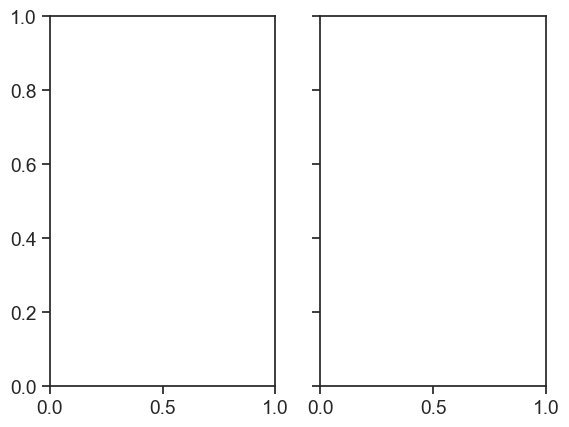

In [31]:
f, ax = plt.subplots(1, 2, sharey=True)

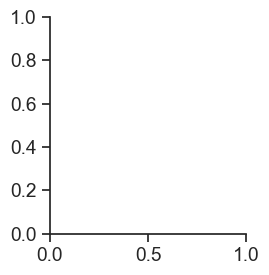

In [32]:
g = sns.FacetGrid(penguins)

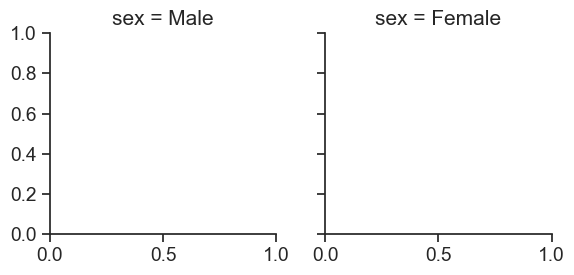

In [33]:
g = sns.FacetGrid(penguins, col="sex")

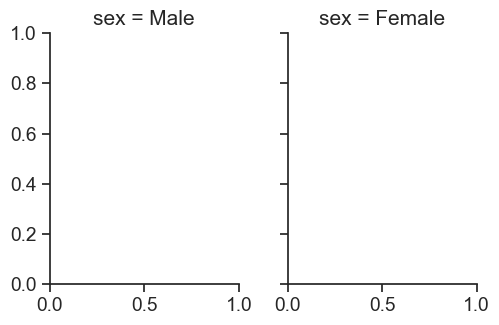

In [34]:
g = sns.FacetGrid(penguins, col="sex", height=3.5, aspect=.75)

In [35]:
flights = sns.load_dataset("flights")
flights.head()

year month  passengers
0  1949   Jan         112
1  1949   Feb         118
2  1949   Mar         132
3  1949   Apr         129
4  1949   May         121

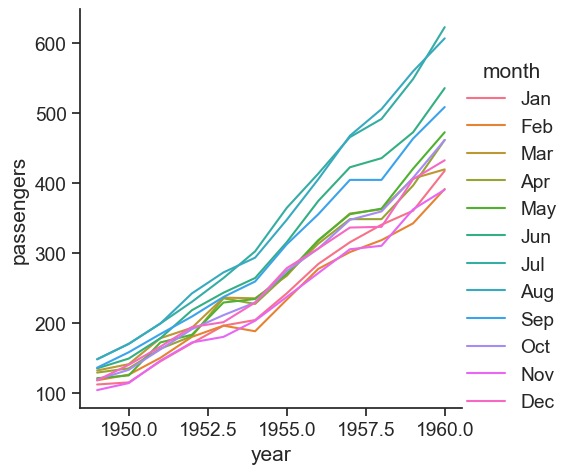

In [36]:
sns.relplot(data=flights, x="year", y="passengers", hue="month", kind="line")

In [37]:
flights_wide = flights.pivot(index="year", columns="month", values="passengers")
flights_wide.head()

month  Jan  Feb  Mar  Apr  May  Jun  Jul  Aug  Sep  Oct  Nov  Dec
year                                                             
1949   112  118  132  129  121  135  148  148  136  119  104  118
1950   115  126  141  135  125  149  170  170  158  133  114  140
1951   145  150  178  163  172  178  199  199  184  162  146  166
1952   171  180  193  181  183  218  230  242  209  191  172  194
1953   196  196  236  235  229  243  264  272  237  211  180  201

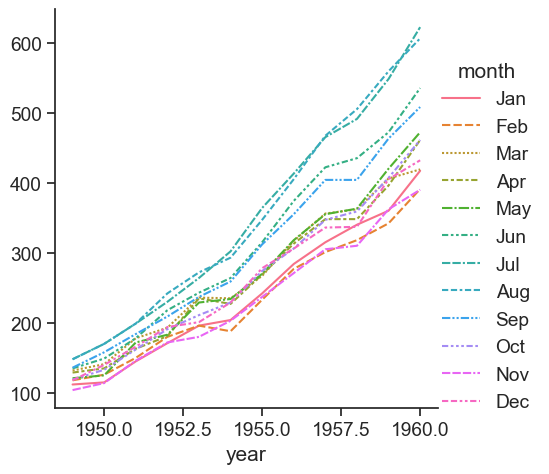

In [38]:
sns.relplot(data=flights_wide, kind="line")

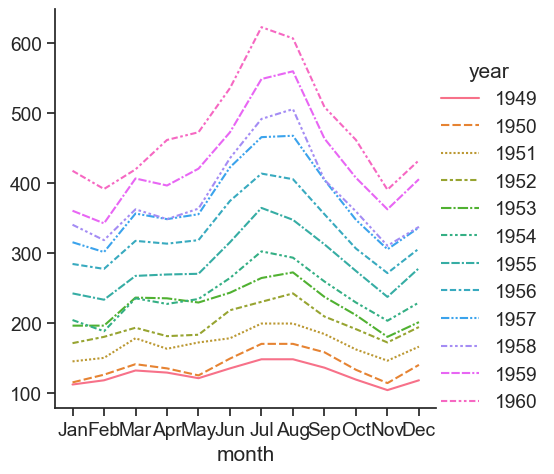

In [40]:
sns.relplot(data=flights_wide.transpose(), kind="line")

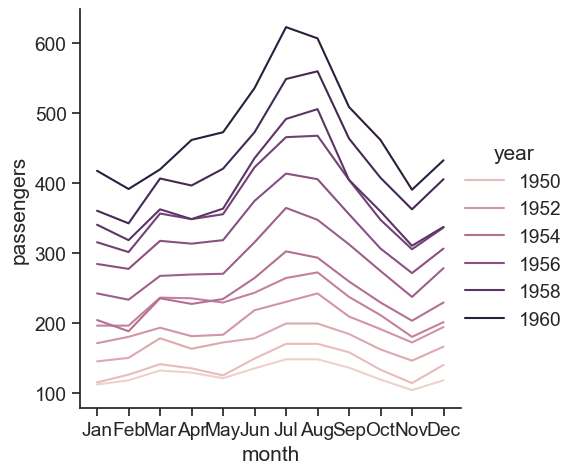

In [39]:
sns.relplot(data=flights, x="month", y="passengers", hue="year", kind="line")

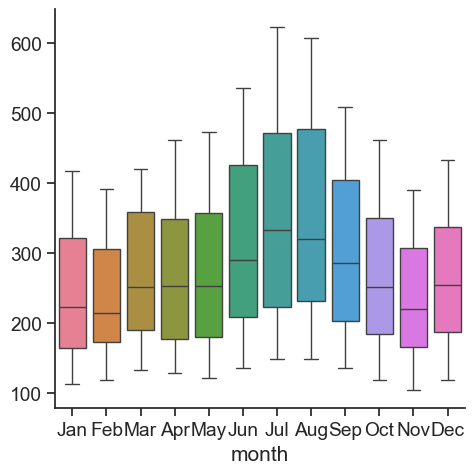

In [41]:
sns.catplot(data=flights_wide, kind="box")

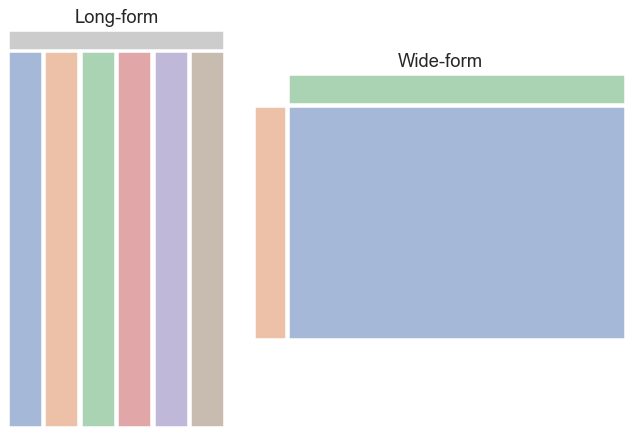

In [42]:
anagrams = sns.load_dataset("anagrams")
anagrams

subidr    attnr  num1  num2  num3
0        1  divided     2   4.0     7
1        2  divided     3   4.0     5
2        3  divided     3   5.0     6
3        4  divided     5   7.0     5
4        5  divided     4   5.0     8
5        6  divided     5   5.0     6
6        7  divided     5   4.5     6
7        8  divided     5   7.0     8
8        9  divided     2   3.0     7
9       10  divided     6   5.0     6
10      11  focused     6   5.0     6
11      12  focused     8   9.0     8
12      13  focused     6   5.0     9
13      14  focused     8   8.0     7
14      15  focused     8   8.0     7
15      16  focused     6   8.0     7
16      17  focused     7   7.0     6
17      18  focused     7   8.0     6
18      19  focused     5   6.0     6
19      20  focused     6   6.0     5

In [43]:
anagrams_long = anagrams.melt(id_vars=["subidr", "attnr"], var_name="solutions", value_name="score")
anagrams_long.head()

subidr    attnr solutions  score
0       1  divided      num1    2.0
1       2  divided      num1    3.0
2       3  divided      num1    3.0
3       4  divided      num1    5.0
4       5  divided      num1    4.0

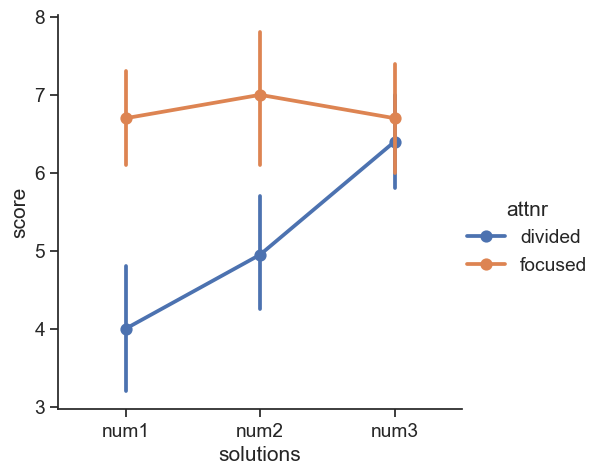

In [44]:
sns.catplot(data=anagrams_long, x="solutions", y="score", hue="attnr", kind="point")

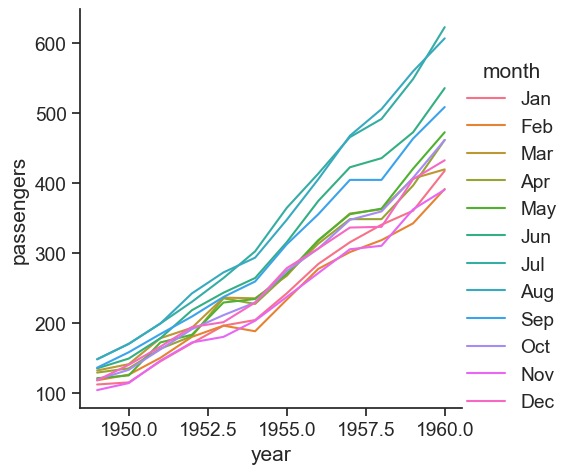

In [45]:
flights_dict = flights.to_dict()
sns.relplot(data=flights_dict, x="year", y="passengers", hue="month", kind="line")

In [56]:
flights_dict

{'year': {0: 1949,
  1: 1949,
  2: 1949,
  3: 1949,
  4: 1949,
  5: 1949,
  6: 1949,
  7: 1949,
  8: 1949,
  9: 1949,
  10: 1949,
  11: 1949,
  12: 1950,
  13: 1950,
  14: 1950,
  15: 1950,
  16: 1950,
  17: 1950,
  18: 1950,
  19: 1950,
  20: 1950,
  21: 1950,
  22: 1950,
  23: 1950,
  24: 1951,
  25: 1951,
  26: 1951,
  27: 1951,
  28: 1951,
  29: 1951,
  30: 1951,
  31: 1951,
  32: 1951,
  33: 1951,
  34: 1951,
  35: 1951,
  36: 1952,
  37: 1952,
  38: 1952,
  39: 1952,
  40: 1952,
  41: 1952,
  42: 1952,
  43: 1952,
  44: 1952,
  45: 1952,
  46: 1952,
  47: 1952,
  48: 1953,
  49: 1953,
  50: 1953,
  51: 1953,
  52: 1953,
  53: 1953,
  54: 1953,
  55: 1953,
  56: 1953,
  57: 1953,
  58: 1953,
  59: 1953,
  60: 1954,
  61: 1954,
  62: 1954,
  63: 1954,
  64: 1954,
  65: 1954,
  66: 1954,
  67: 1954,
  68: 1954,
  69: 1954,
  70: 1954,
  71: 1954,
  72: 1955,
  73: 1955,
  74: 1955,
  75: 1955,
  76: 1955,
  77: 1955,
  78: 1955,
  79: 1955,
  80: 1955,
  81: 1955,
  82: 1955,
  83: 

In [46]:
flights_avg = flights.groupby("year").mean(numeric_only=True)

In [47]:
flights_avg

passengers
year            
1949  126.666667
1950  139.666667
1951  170.166667
1952  197.000000
1953  225.000000
1954  238.916667
1955  284.000000
1956  328.250000
1957  368.416667
1958  381.000000
1959  428.333333
1960  476.166667

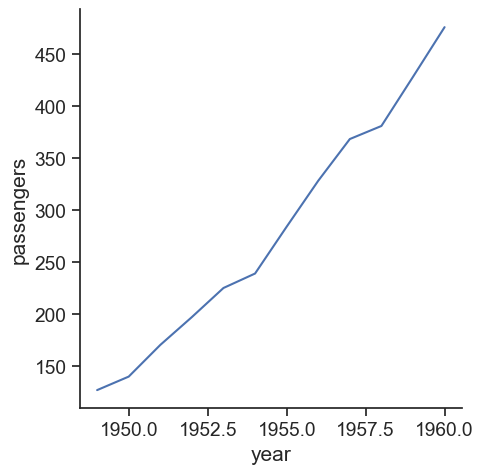

In [48]:

sns.relplot(data=flights_avg, x="year", y="passengers", kind="line")

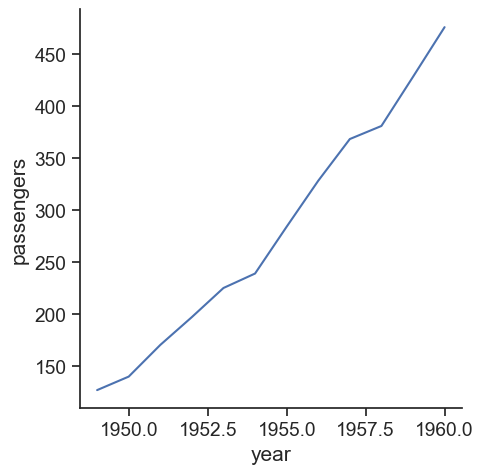

In [49]:
year = flights_avg.index
passengers = flights_avg["passengers"]
sns.relplot(x=year, y=passengers, kind="line")

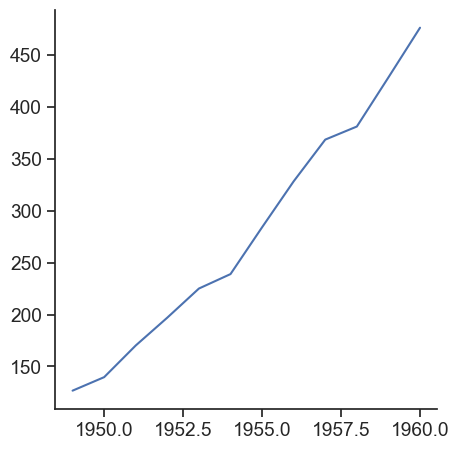

In [50]:
sns.relplot(x=year.to_numpy(), y=passengers.to_list(), kind="line")

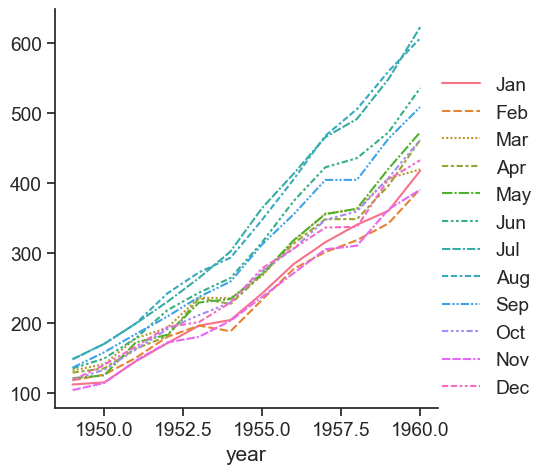

In [51]:
flights_wide_list = [col for _, col in flights_wide.items()]
sns.relplot(data=flights_wide_list, kind="line")

In [57]:
flights_wide_list

[year
 1949    112
 1950    115
 1951    145
 1952    171
 1953    196
 1954    204
 1955    242
 1956    284
 1957    315
 1958    340
 1959    360
 1960    417
 Name: Jan, dtype: int64,
 year
 1949    118
 1950    126
 1951    150
 1952    180
 1953    196
 1954    188
 1955    233
 1956    277
 1957    301
 1958    318
 1959    342
 1960    391
 Name: Feb, dtype: int64,
 year
 1949    132
 1950    141
 1951    178
 1952    193
 1953    236
 1954    235
 1955    267
 1956    317
 1957    356
 1958    362
 1959    406
 1960    419
 Name: Mar, dtype: int64,
 year
 1949    129
 1950    135
 1951    163
 1952    181
 1953    235
 1954    227
 1955    269
 1956    313
 1957    348
 1958    348
 1959    396
 1960    461
 Name: Apr, dtype: int64,
 year
 1949    121
 1950    125
 1951    172
 1952    183
 1953    229
 1954    234
 1955    270
 1956    318
 1957    355
 1958    363
 1959    420
 1960    472
 Name: May, dtype: int64,
 year
 1949    135
 1950    149
 1951    178
 1952    218
 1

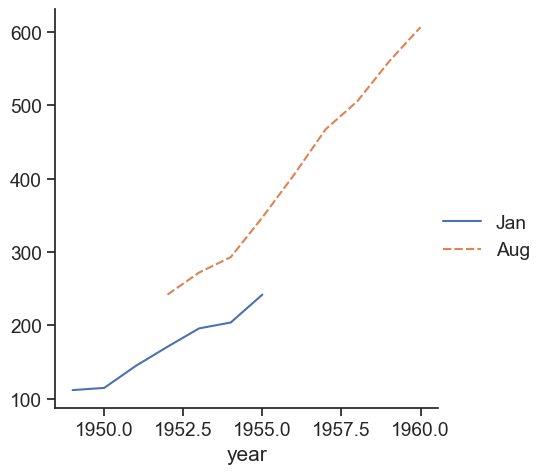

In [52]:
two_series = [flights_wide.loc[:1955, "Jan"], flights_wide.loc[1952:, "Aug"]]
sns.relplot(data=two_series, kind="line")

In [58]:
two_series

[year
 1949    112
 1950    115
 1951    145
 1952    171
 1953    196
 1954    204
 1955    242
 Name: Jan, dtype: int64,
 year
 1952    242
 1953    272
 1954    293
 1955    347
 1956    405
 1957    467
 1958    505
 1959    559
 1960    606
 Name: Aug, dtype: int64]

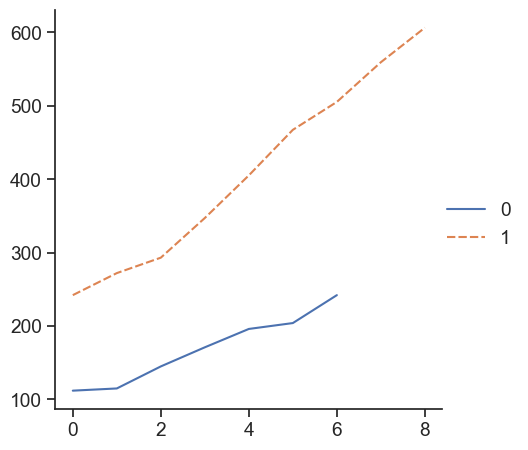

In [53]:
two_arrays = [s.to_numpy() for s in two_series]
sns.relplot(data=two_arrays, kind="line")

In [59]:
two_arrays

[array([112, 115, 145, 171, 196, 204, 242]),
 array([242, 272, 293, 347, 405, 467, 505, 559, 606])]

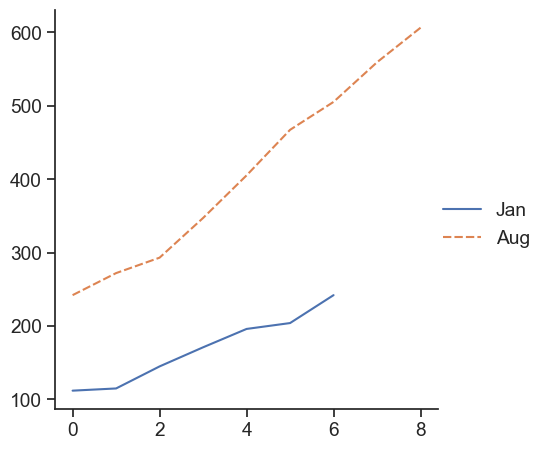

In [54]:
two_arrays_dict = {s.name: s.to_numpy() for s in two_series}
sns.relplot(data=two_arrays_dict, kind="line")

In [60]:
two_arrays_dict

{'Jan': array([112, 115, 145, 171, 196, 204, 242]),
 'Aug': array([242, 272, 293, 347, 405, 467, 505, 559, 606])}

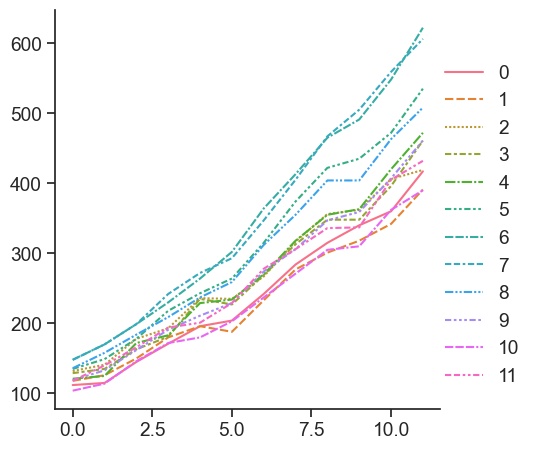

In [55]:
flights_array = flights_wide.to_numpy()
sns.relplot(data=flights_array, kind="line")

In [61]:
flights_array

array([[112, 118, 132, 129, 121, 135, 148, 148, 136, 119, 104, 118],
       [115, 126, 141, 135, 125, 149, 170, 170, 158, 133, 114, 140],
       [145, 150, 178, 163, 172, 178, 199, 199, 184, 162, 146, 166],
       [171, 180, 193, 181, 183, 218, 230, 242, 209, 191, 172, 194],
       [196, 196, 236, 235, 229, 243, 264, 272, 237, 211, 180, 201],
       [204, 188, 235, 227, 234, 264, 302, 293, 259, 229, 203, 229],
       [242, 233, 267, 269, 270, 315, 364, 347, 312, 274, 237, 278],
       [284, 277, 317, 313, 318, 374, 413, 405, 355, 306, 271, 306],
       [315, 301, 356, 348, 355, 422, 465, 467, 404, 347, 305, 336],
       [340, 318, 362, 348, 363, 435, 491, 505, 404, 359, 310, 337],
       [360, 342, 406, 396, 420, 472, 548, 559, 463, 407, 362, 405],
       [417, 391, 419, 461, 472, 535, 622, 606, 508, 461, 390, 432]])

flights_array

x, y, xmin, xmax, ymin, ymax

he x coordinate is the horizontal position and the y coordinate is the vertical position. Some marks accept a span (i.e., min, max) parameterization for one or both variables. Others may accept x and y but also use a baseline parameter to show a span. The layer’s orient parameter determines how this works.

If a variable does not contain numeric data, its scale will apply a conversion so that data can be drawn on a screen. For instance, Nominal scales assign an integer index to each distinct category, and Temporal scales represent dates as the number of days from a reference “epoch”:

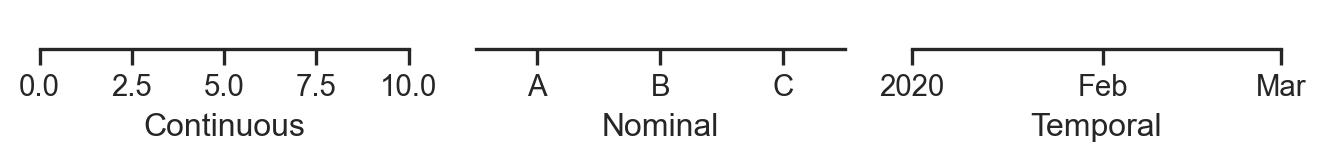

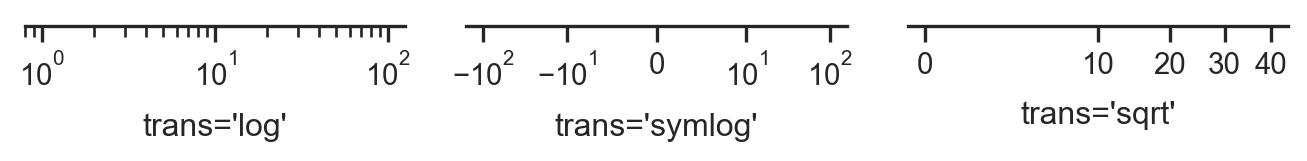

color, fillcolor, edgecolor

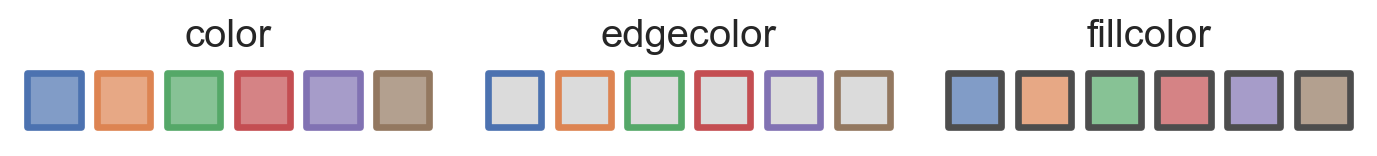

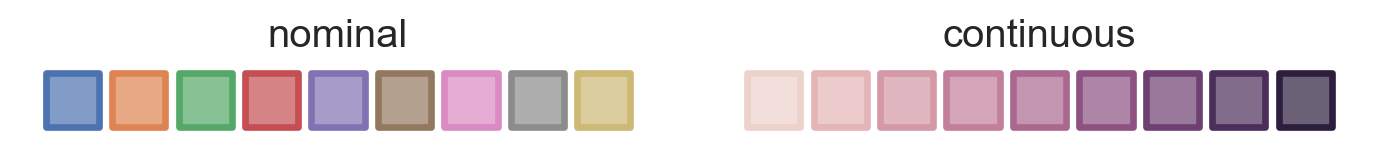

alpha, fillalpha, edgealpha

The alpha property determines the mark’s opacity. Lowering the alpha can be helpful for representing density in the case of overplotting:

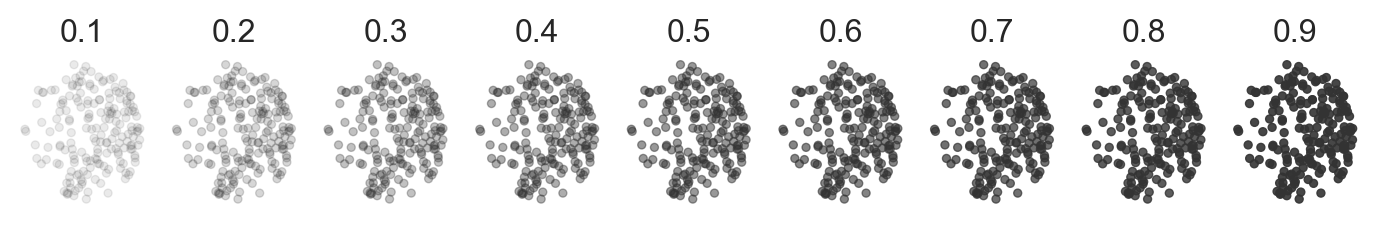

fill

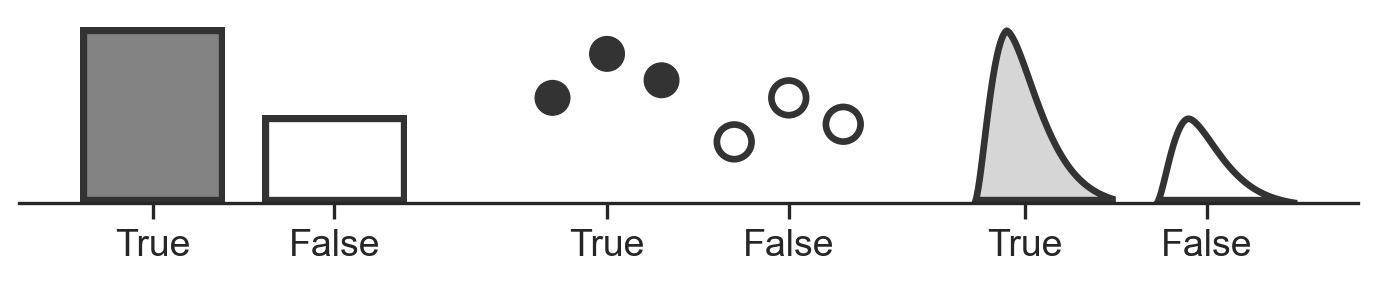

marker

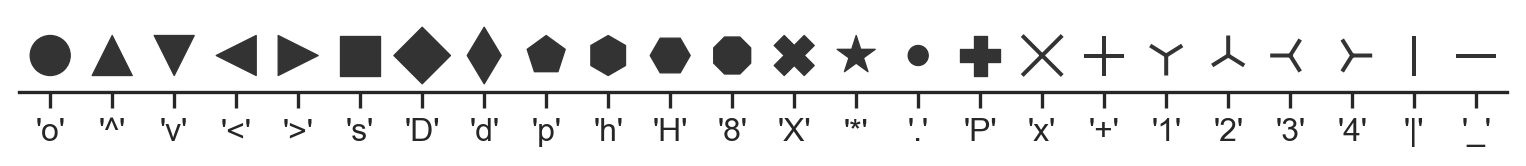

(num_sides, fill_style, angle) tuple:

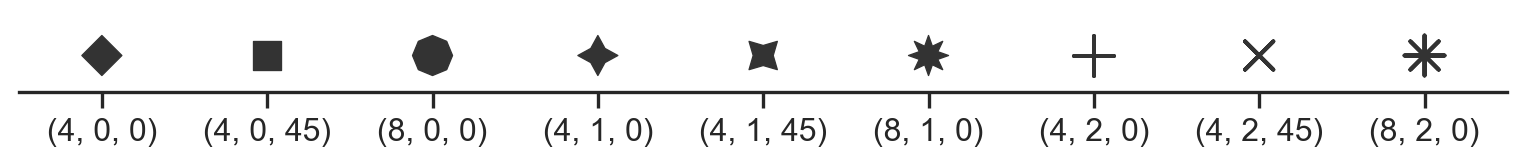

linestyle, edgestyle

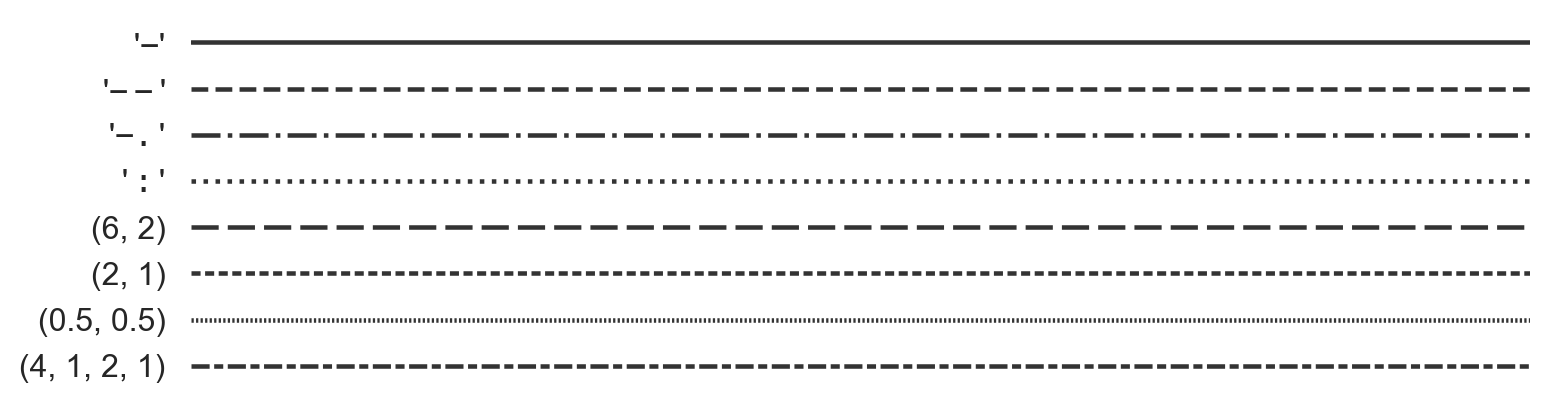

pointsize

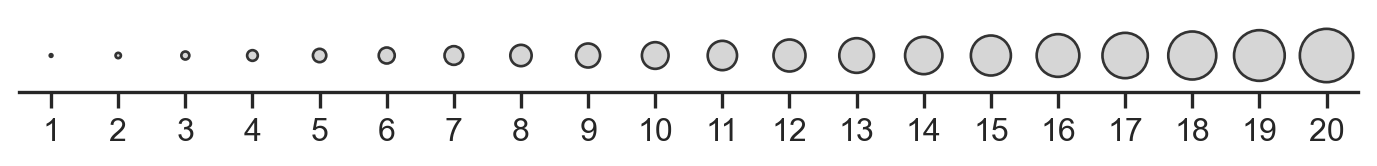

linewidth

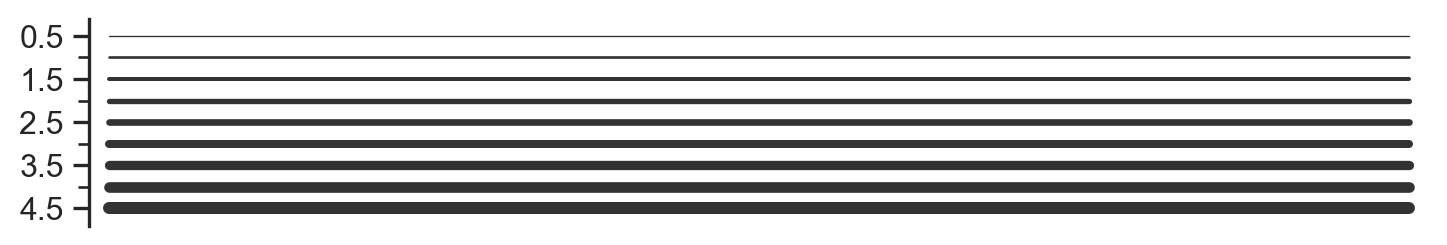

edgewidth

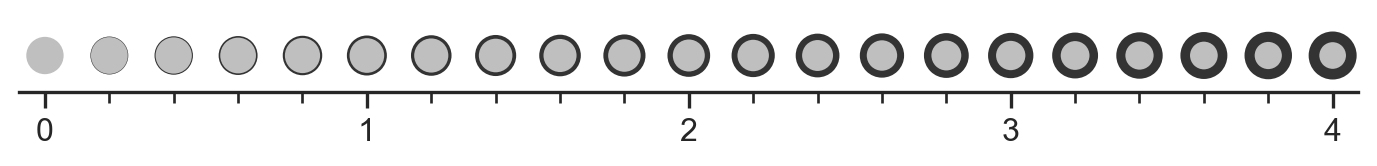

stroke

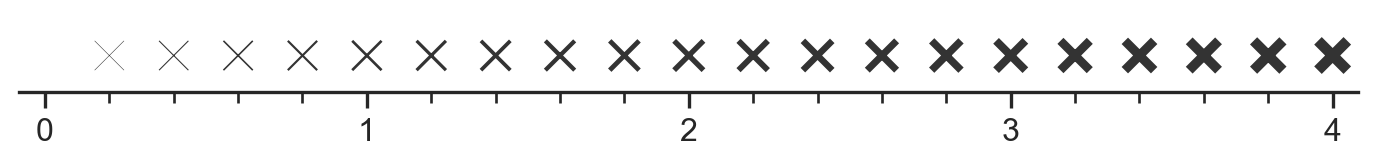

offset
The offset property controls the spacing between a text mark and its anchor position. It applies when not using center alignment (i.e., when using left/right or top/bottom). The value has point units.

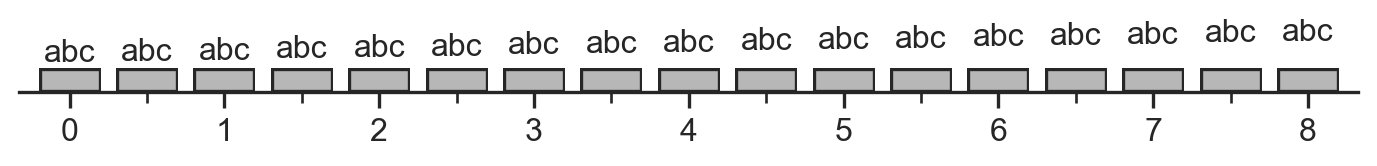

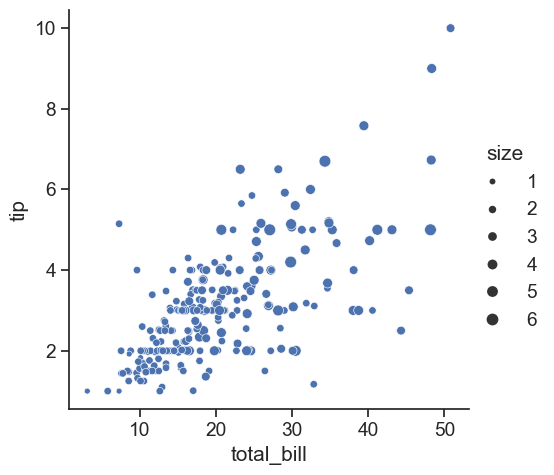

In [62]:
sns.relplot(data=tips, x="total_bill", y="tip", size="size")

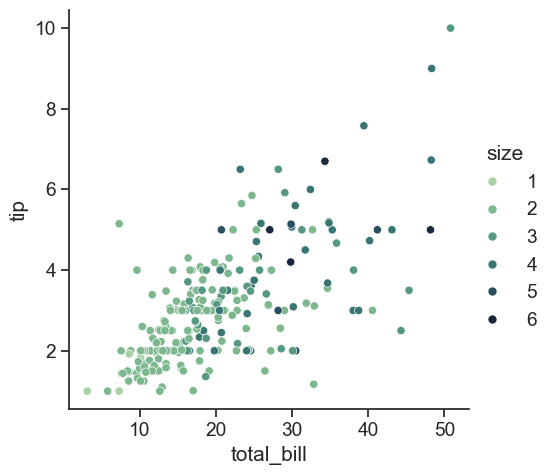

In [63]:
sns.relplot(
    data=tips,
    x="total_bill", y="tip",
    hue="size", palette="ch:r=-.5,l=.75"
)

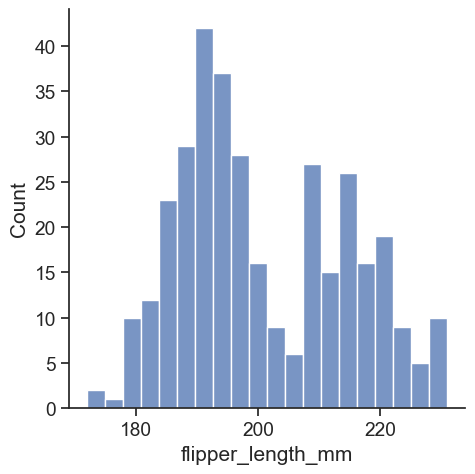

In [64]:
sns.displot(penguins, x="flipper_length_mm", binwidth=3)

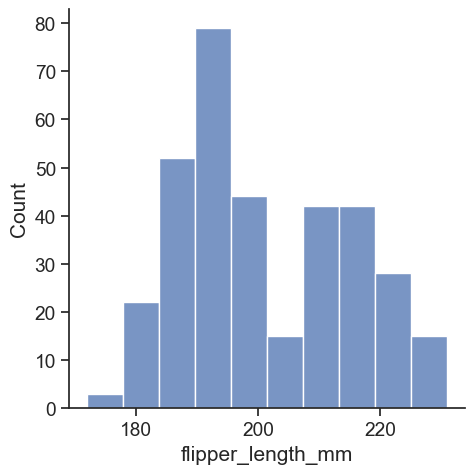

In [65]:
penguins = sns.load_dataset("penguins")
sns.displot(penguins, x="flipper_length_mm")

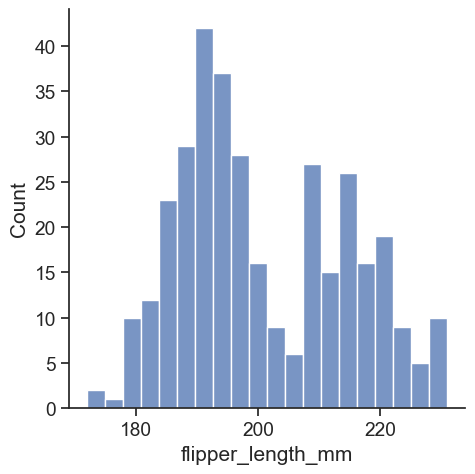

In [66]:
sns.displot(penguins, x="flipper_length_mm", bins=20)

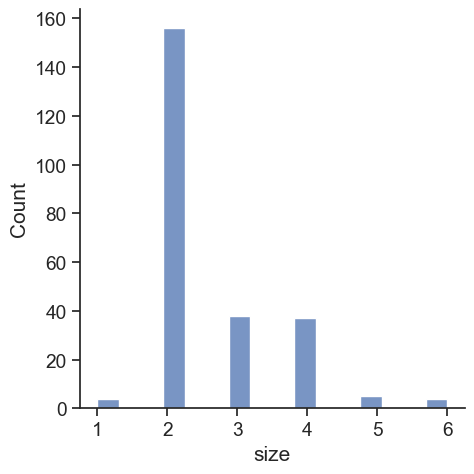

In [67]:
tips = sns.load_dataset("tips")
sns.displot(tips, x="size")

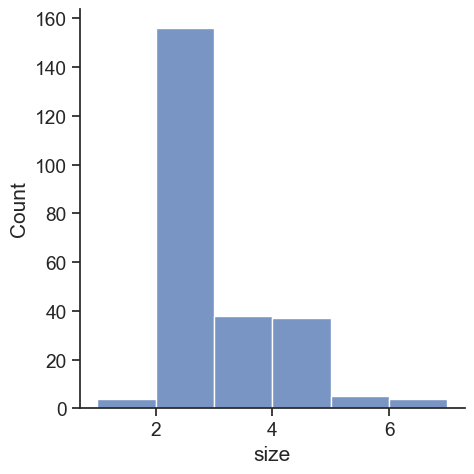

In [68]:
sns.displot(tips, x="size", bins=[1, 2, 3, 4, 5, 6, 7])

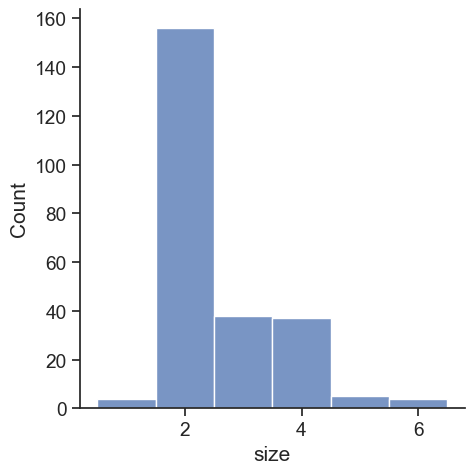

In [69]:
sns.displot(tips, x="size", discrete=True)

It’s also possible to visualize the distribution of a categorical variable using the logic of a histogram. Discrete bins are automatically set for categorical variables, but it may also be helpful to “shrink” the bars slightly to emphasize the categorical nature of the axis:

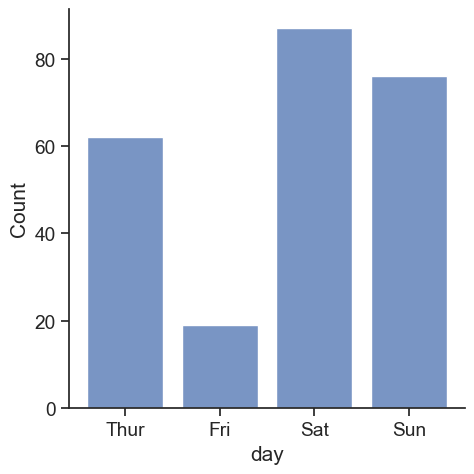

In [70]:
sns.displot(tips, x="day", shrink=.8)

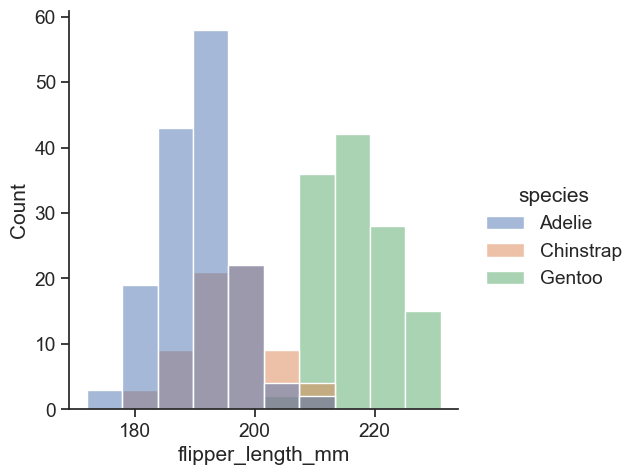

In [71]:
sns.displot(penguins, x="flipper_length_mm", hue="species")

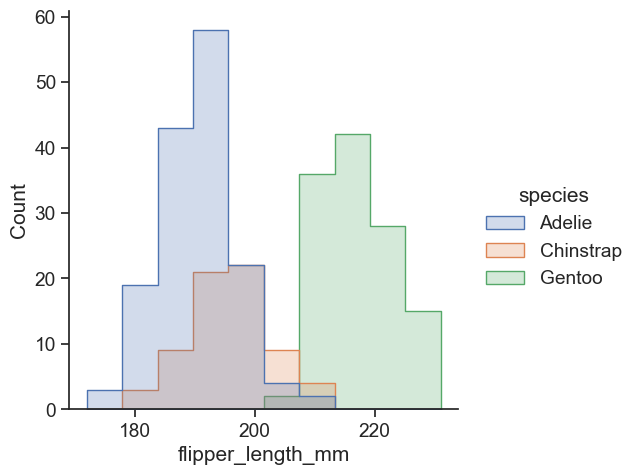

In [72]:
sns.displot(penguins, x="flipper_length_mm", hue="species", element="step")

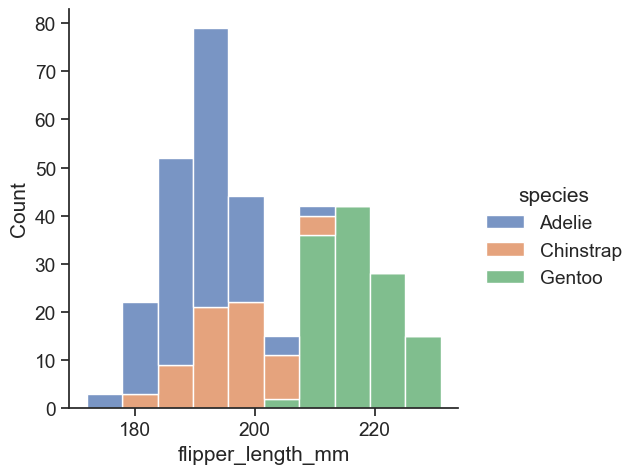

In [73]:
sns.displot(penguins, x="flipper_length_mm", hue="species", multiple="stack")

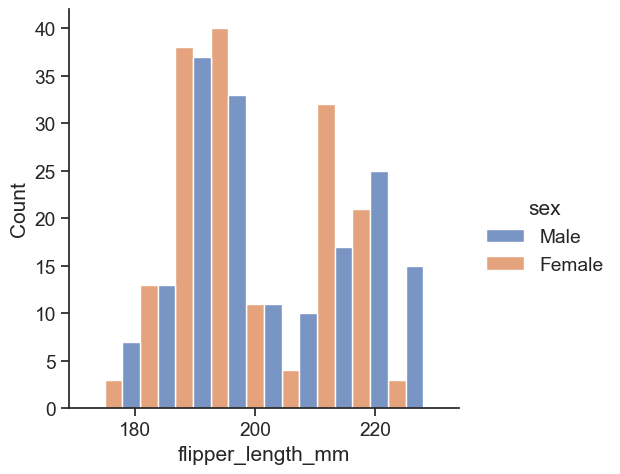

In [74]:
sns.displot(penguins, x="flipper_length_mm", hue="sex", multiple="dodge")

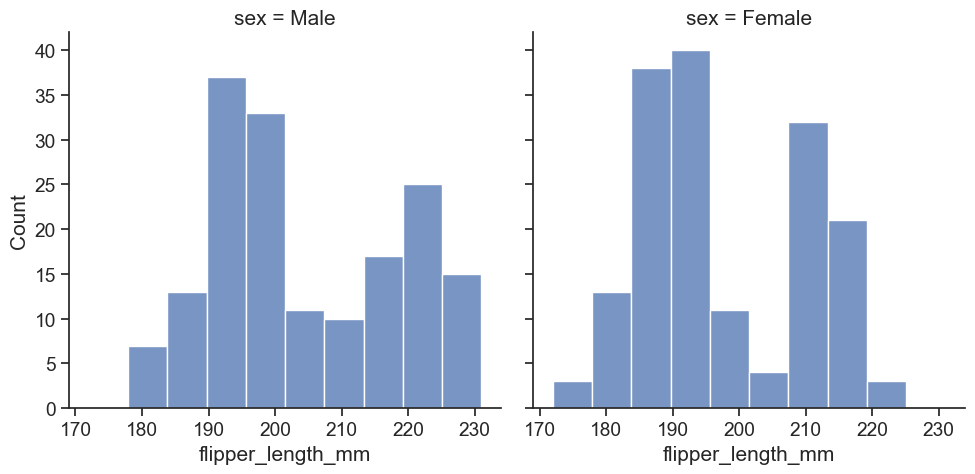

In [76]:
sns.displot(penguins, x="flipper_length_mm", col="sex")

Normalized histogram statistics
Before we do, another point to note is that, when the subsets have unequal numbers of observations, comparing their distributions in terms of counts may not be ideal. One solution is to normalize the counts using the stat parameter:

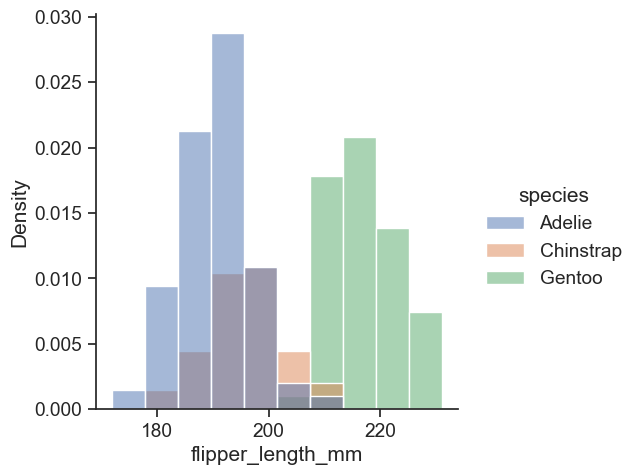

In [77]:
sns.displot(penguins, x="flipper_length_mm", hue="species", stat="density")

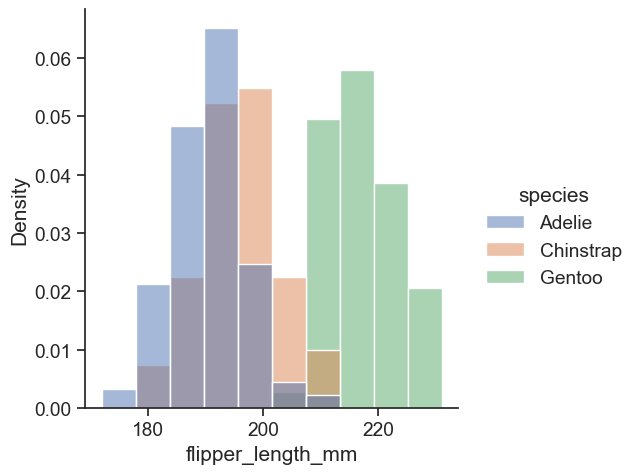

In [78]:
sns.displot(penguins, x="flipper_length_mm", hue="species", stat="density", common_norm=False)

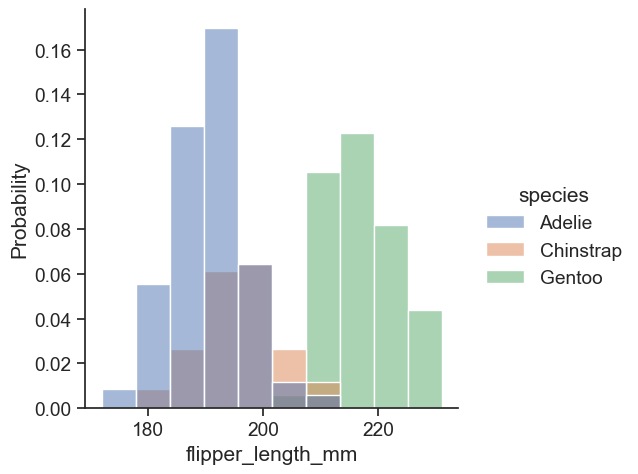

In [79]:
sns.displot(penguins, x="flipper_length_mm", hue="species", stat="probability")

Kernel density estimation

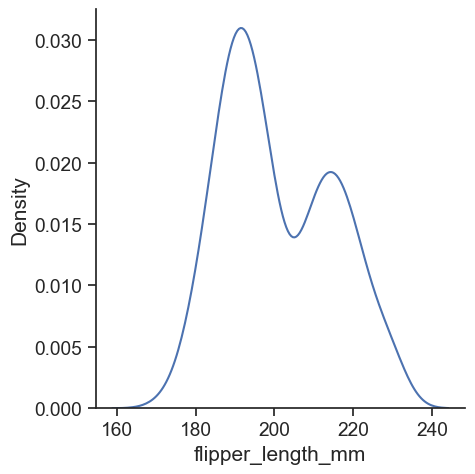

In [80]:
sns.displot(penguins, x="flipper_length_mm", kind="kde")

In [82]:
# Choosing the smoothing bandwidth

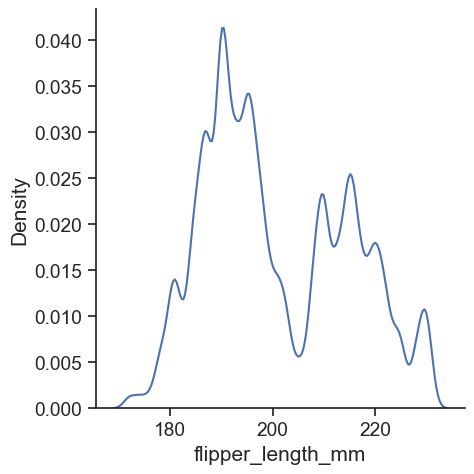

In [83]:
sns.displot(penguins, x="flipper_length_mm", kind="kde", bw_adjust=.25)

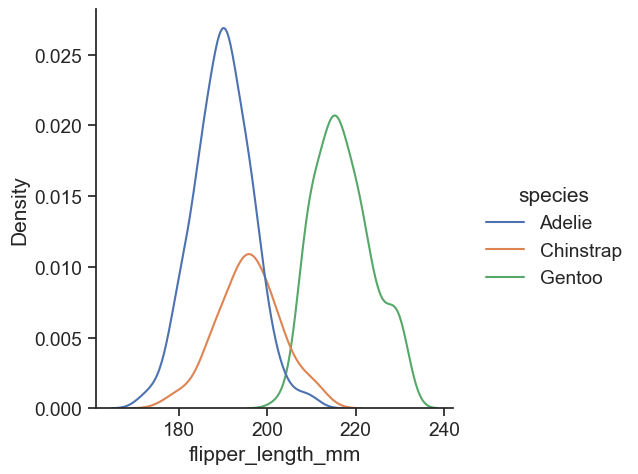

In [85]:
sns.displot(penguins, x="flipper_length_mm", hue="species", kind="kde")

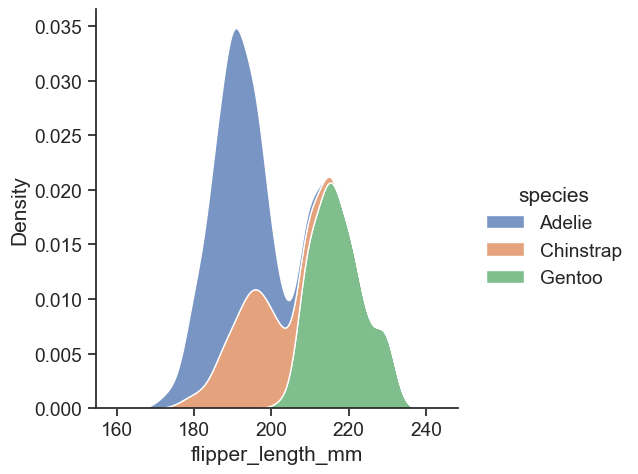

In [86]:
sns.displot(penguins, x="flipper_length_mm", hue="species", kind="kde", multiple="stack")

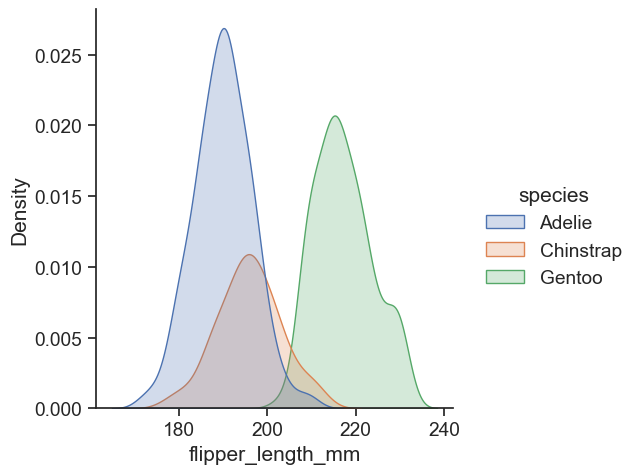

In [87]:
sns.displot(penguins, x="flipper_length_mm", hue="species", kind="kde", fill=True)

Kernel density estimation pitfalls

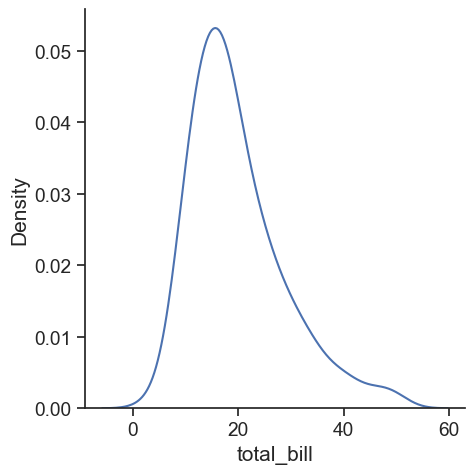

In [88]:
sns.displot(tips, x="total_bill", kind="kde")

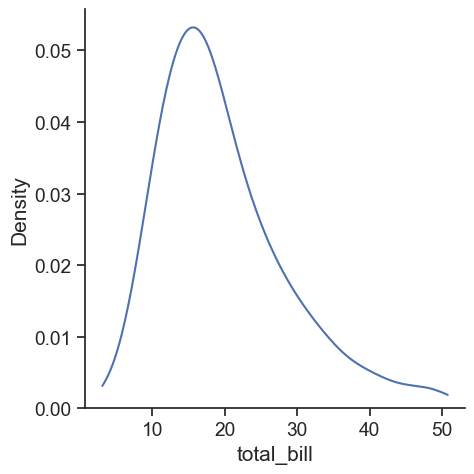

In [89]:
sns.displot(tips, x="total_bill", kind="kde", cut=0)

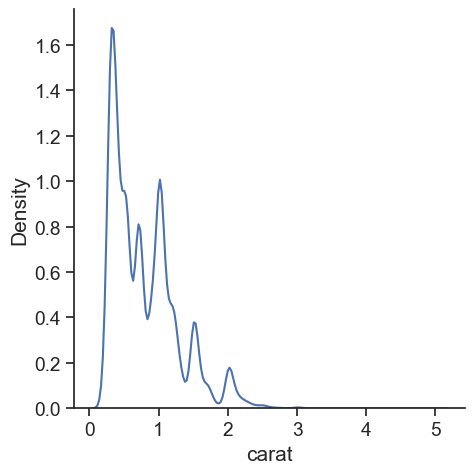

In [90]:
diamonds = sns.load_dataset("diamonds")
sns.displot(diamonds, x="carat", kind="kde")

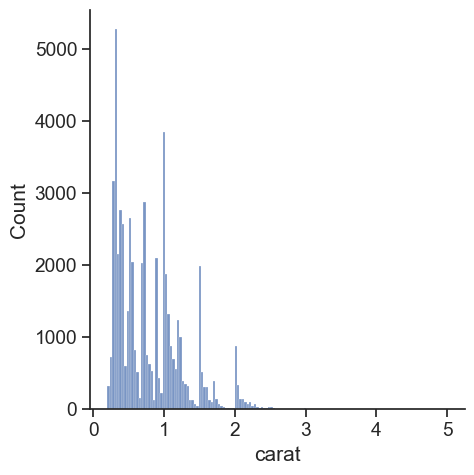

In [91]:
sns.displot(diamonds, x="carat")

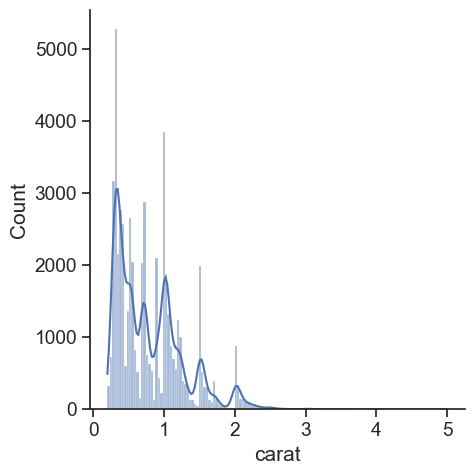

In [92]:
sns.displot(diamonds, x="carat", kde=True)

Empirical cumulative distributions

A third option for visualizing distributions computes the “empirical cumulative distribution function” (ECDF). This plot draws a monotonically-increasing curve through each datapoint such that the height of the curve reflects the proportion of observations with a smaller value:

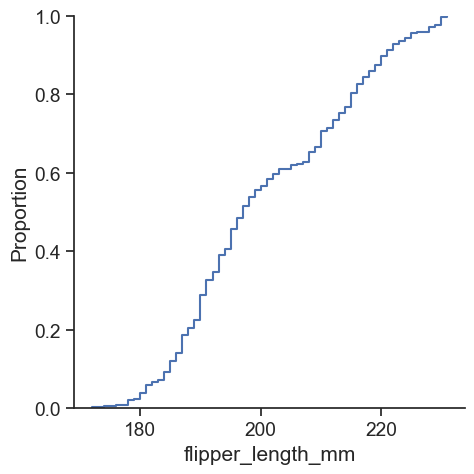

In [93]:
sns.displot(penguins, x="flipper_length_mm", kind="ecdf")

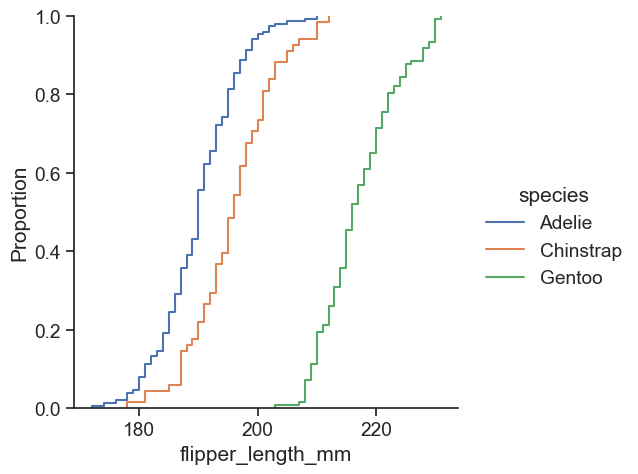

In [94]:
sns.displot(penguins, x="flipper_length_mm", hue="species", kind="ecdf")

Visualizing bivariate distributions


All of the examples so far have considered univariate distributions: distributions of a single variable, perhaps conditional on a second variable assigned to hue. Assigning a second variable to y, however, will plot a bivariate distribution:

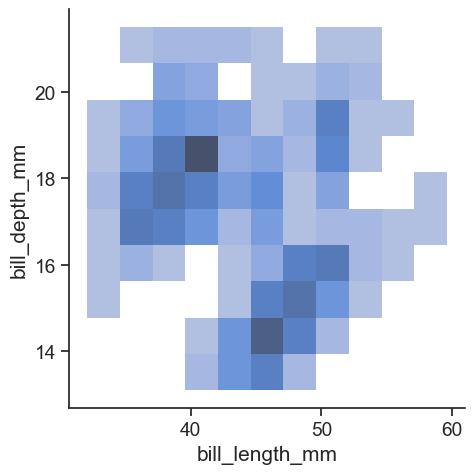

In [95]:
sns.displot(penguins, x="bill_length_mm", y="bill_depth_mm")


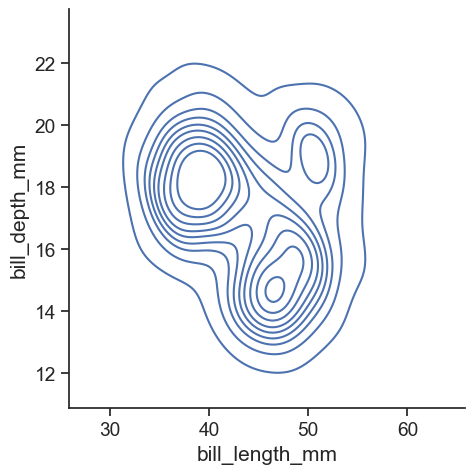

In [96]:
sns.displot(penguins, x="bill_length_mm", y="bill_depth_mm", kind="kde")

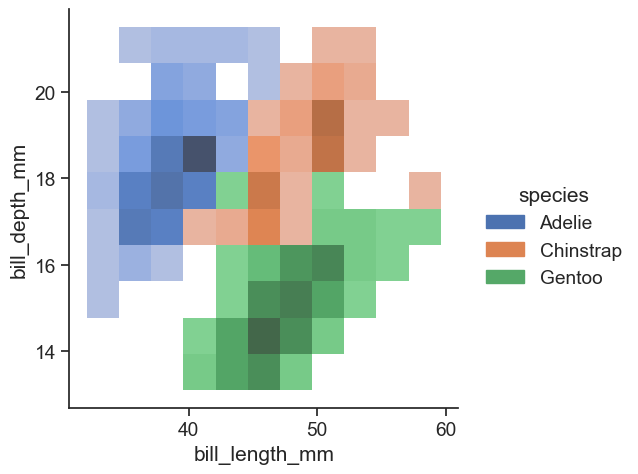

In [97]:
sns.displot(penguins, x="bill_length_mm", y="bill_depth_mm", hue="species")

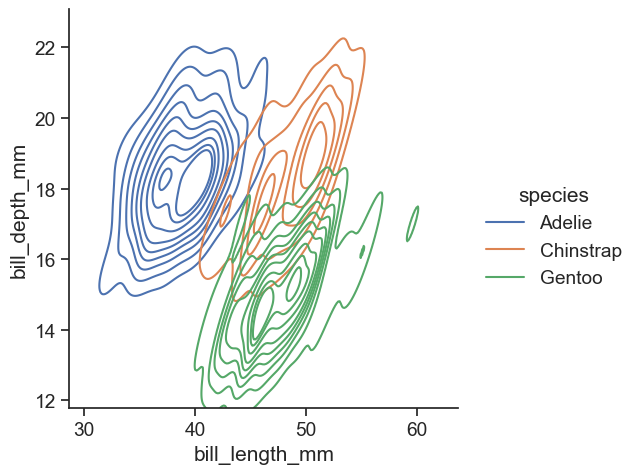

In [98]:
sns.displot(penguins, x="bill_length_mm", y="bill_depth_mm", hue="species", kind="kde")

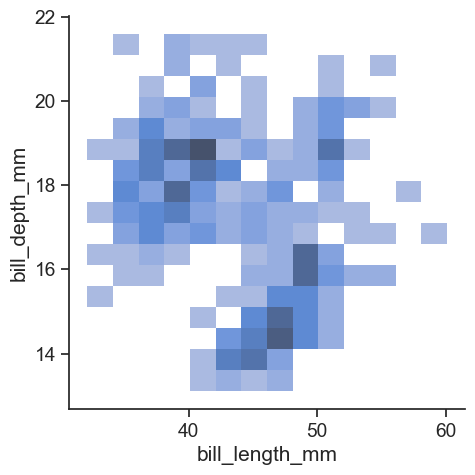

In [99]:
sns.displot(penguins, x="bill_length_mm", y="bill_depth_mm", binwidth=(2, .5))

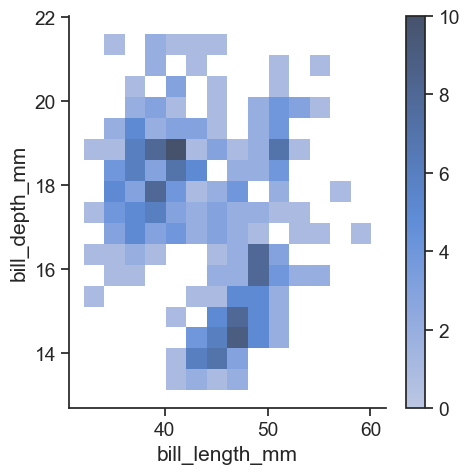

In [100]:
sns.displot(penguins, x="bill_length_mm", y="bill_depth_mm", binwidth=(2, .5), cbar=True)

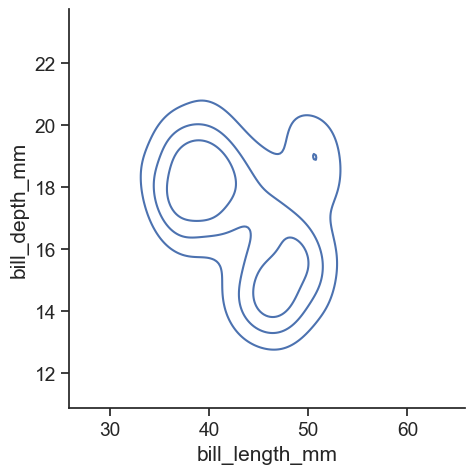

In [101]:
sns.displot(penguins, x="bill_length_mm", y="bill_depth_mm", kind="kde", thresh=.2, levels=4)

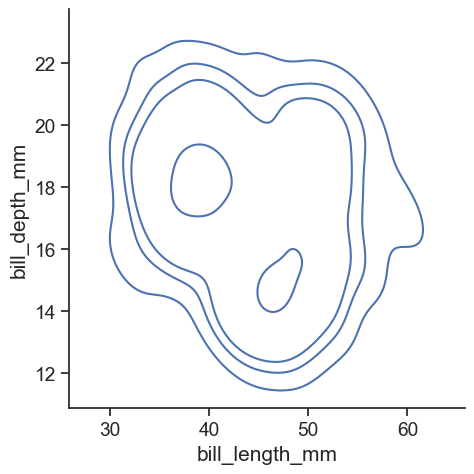

In [102]:
sns.displot(penguins, x="bill_length_mm", y="bill_depth_mm", kind="kde", levels=[.01, .05, .1, .8])

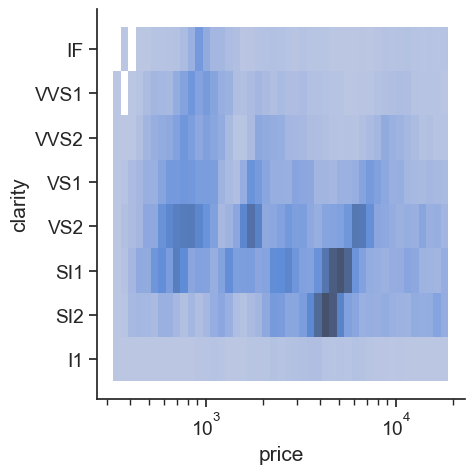

In [103]:
sns.displot(diamonds, x="price", y="clarity", log_scale=(True, False))

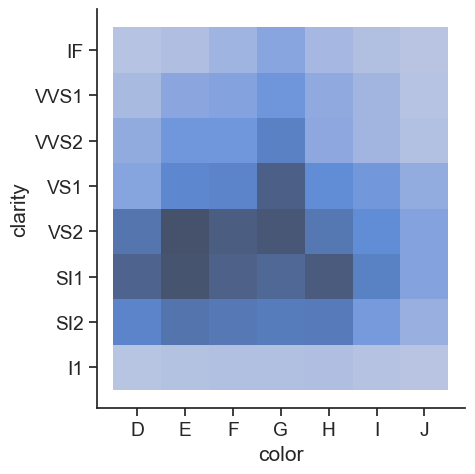

In [104]:
sns.displot(diamonds, x="color", y="clarity")

Distribution visualization in other settings

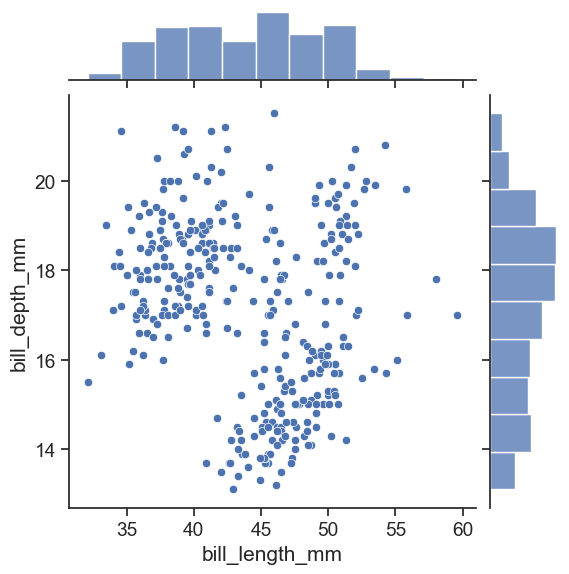

In [105]:
sns.jointplot(data=penguins, x="bill_length_mm", y="bill_depth_mm")

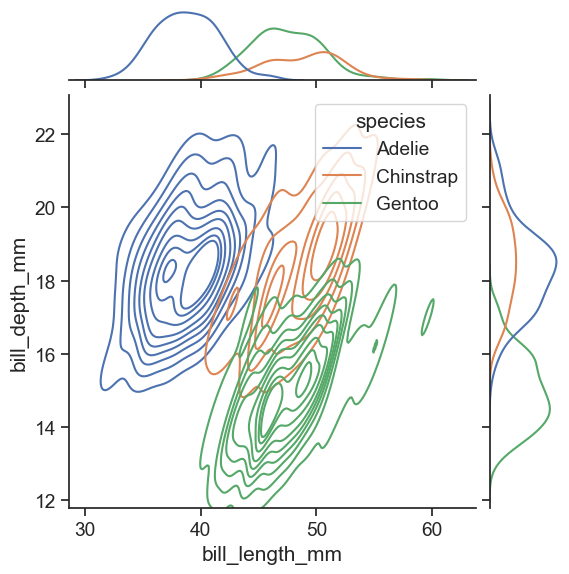

In [106]:
sns.jointplot(
    data=penguins,
    x="bill_length_mm", y="bill_depth_mm", hue="species",
    kind="kde"
)

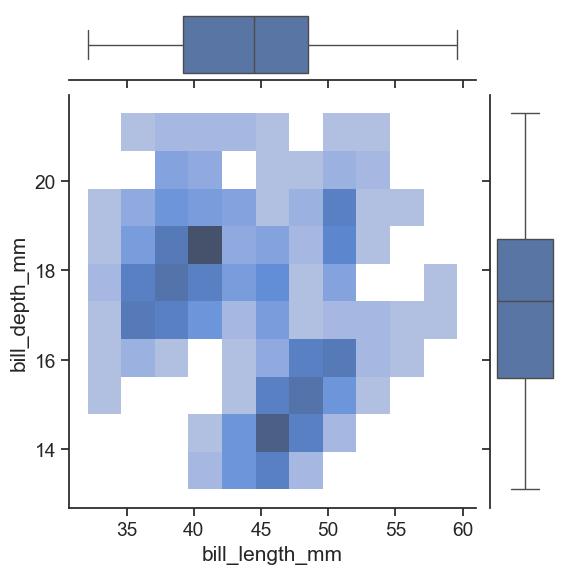

In [107]:
g = sns.JointGrid(data=penguins, x="bill_length_mm", y="bill_depth_mm")
g.plot_joint(sns.histplot)
g.plot_marginals(sns.boxplot)

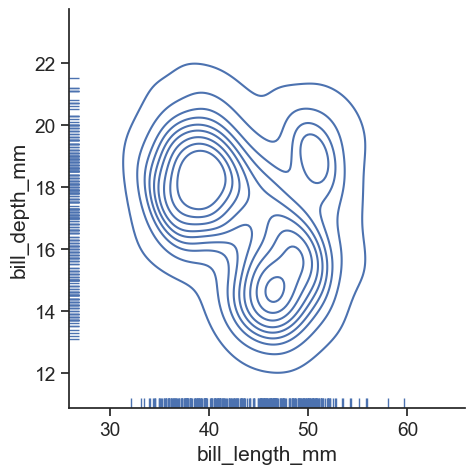

In [108]:
sns.displot(
    penguins, x="bill_length_mm", y="bill_depth_mm",
    kind="kde", rug=True
)

<Axes: xlabel='bill_length_mm', ylabel='bill_depth_mm'>

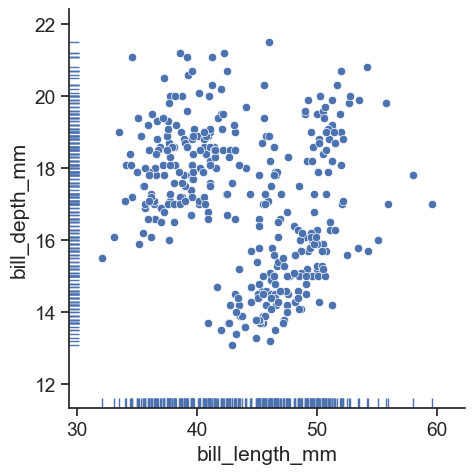

In [109]:
sns.relplot(data=penguins, x="bill_length_mm", y="bill_depth_mm")
sns.rugplot(data=penguins, x="bill_length_mm", y="bill_depth_mm")

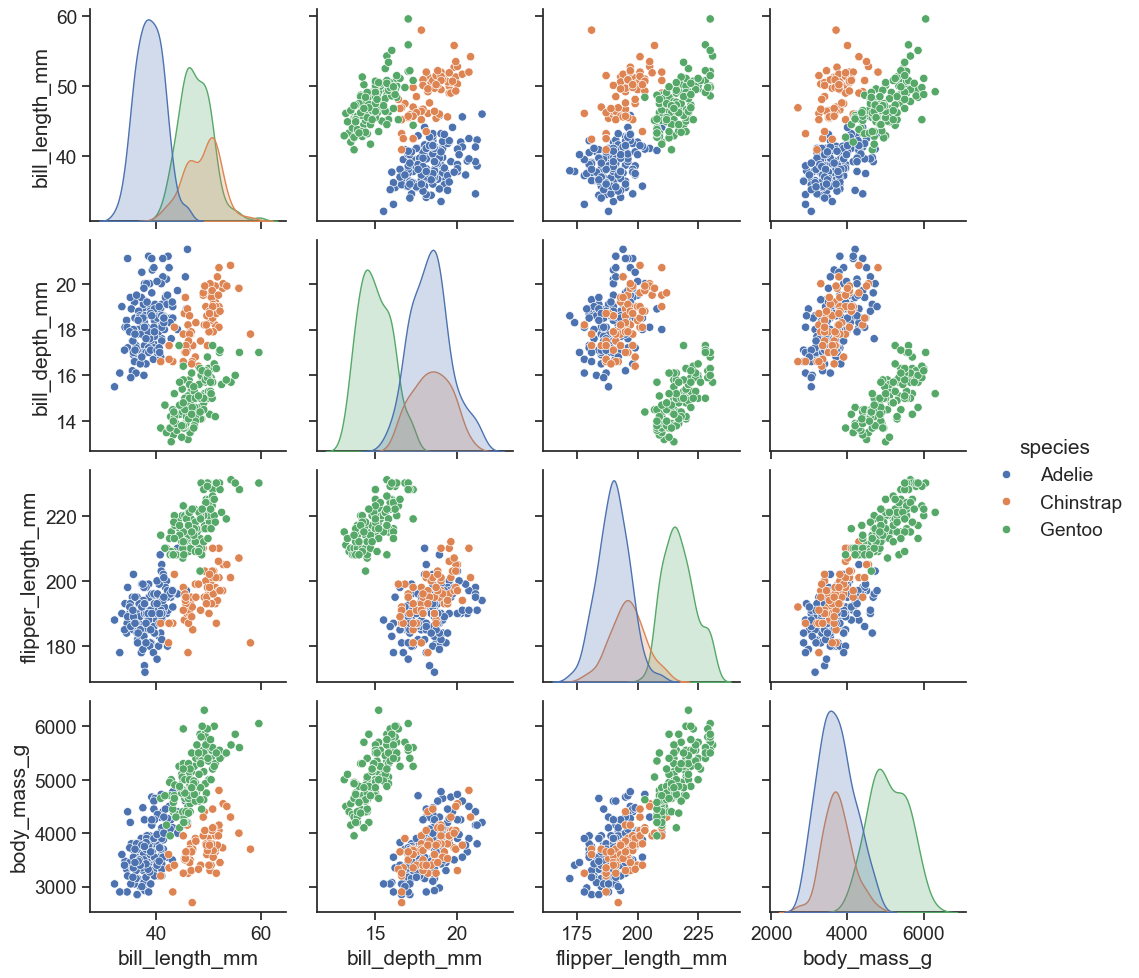

In [111]:
sns.pairplot(penguins,hue='species')

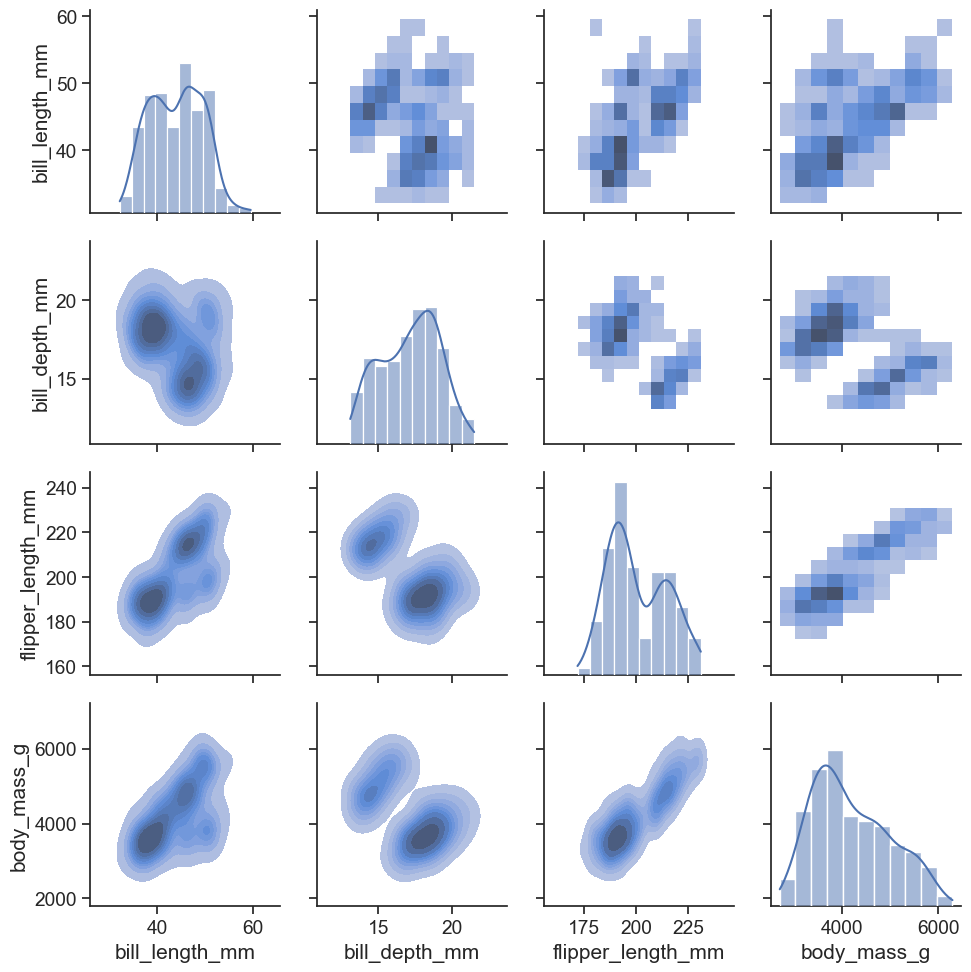

In [112]:
g = sns.PairGrid(penguins)
g.map_upper(sns.histplot)
g.map_lower(sns.kdeplot, fill=True)
g.map_diag(sns.histplot, kde=True)

Visualizing categorical data

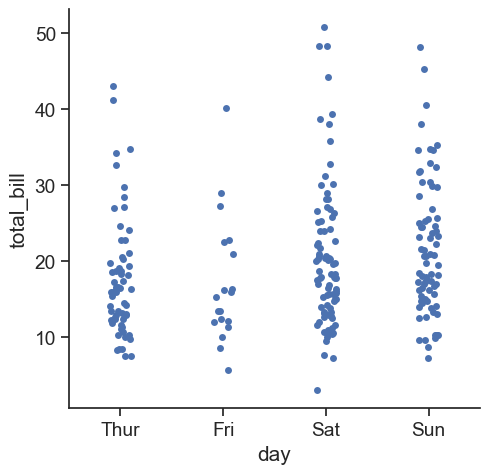

In [113]:
tips = sns.load_dataset("tips")
sns.catplot(data=tips, x="day", y="total_bill")

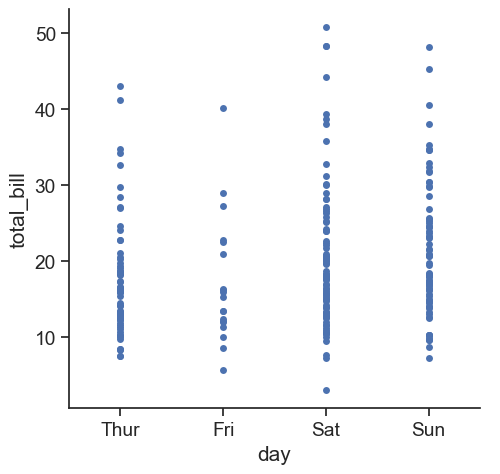

In [114]:
sns.catplot(data=tips, x="day", y="total_bill", jitter=False)

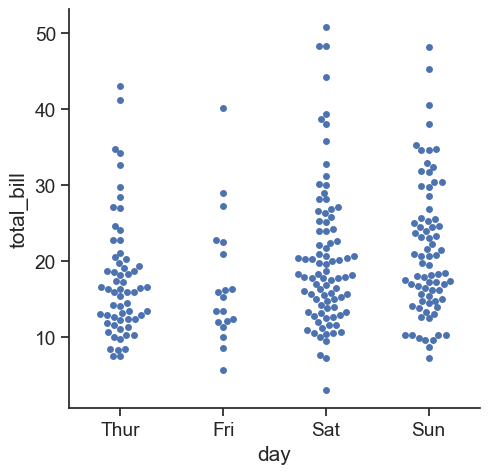

In [115]:
sns.catplot(data=tips, x="day", y="total_bill", kind="swarm")

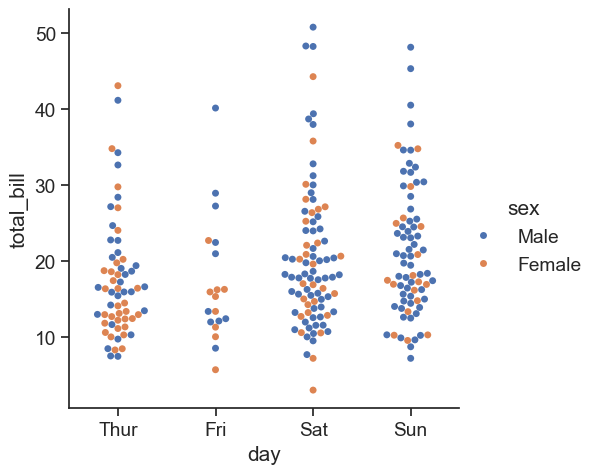

In [116]:
sns.catplot(data=tips, x="day", y="total_bill", hue="sex", kind="swarm")

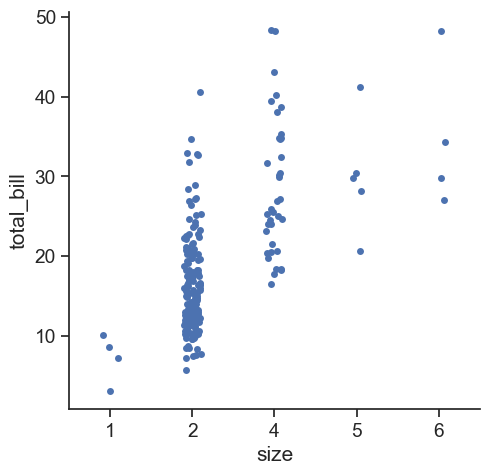

In [117]:
sns.catplot(data=tips.query("size != 3"), x="size", y="total_bill")

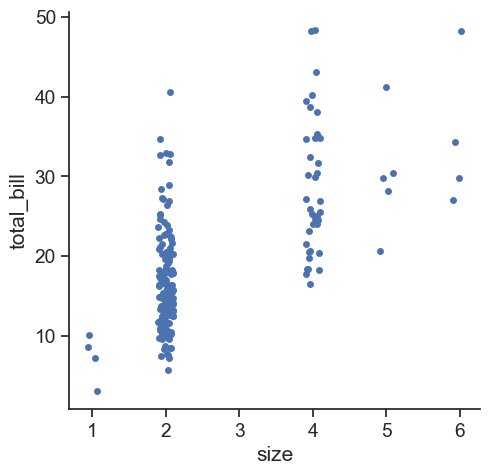

In [119]:
sns.catplot(data=tips.query("size != 3"), x="size", y="total_bill", native_scale=True)

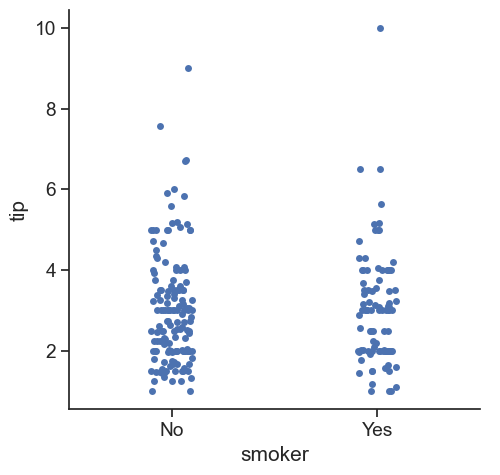

In [120]:
sns.catplot(data=tips, x="smoker", y="tip", order=["No", "Yes"])

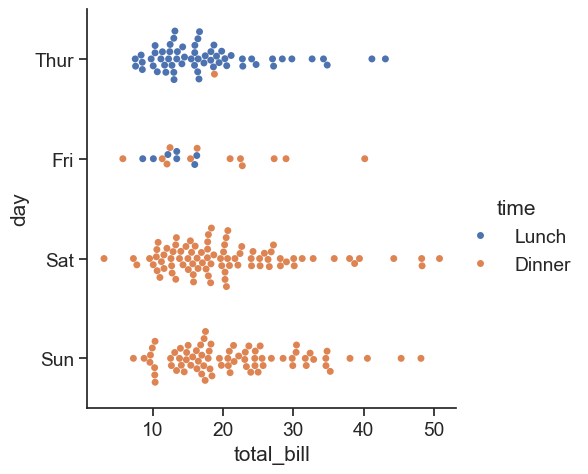

In [121]:
sns.catplot(data=tips, x="total_bill", y="day", hue="time", kind="swarm")

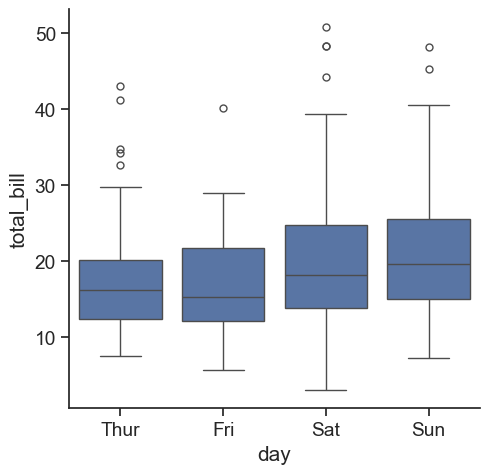

In [122]:
sns.catplot(data=tips, x="day", y="total_bill", kind="box")

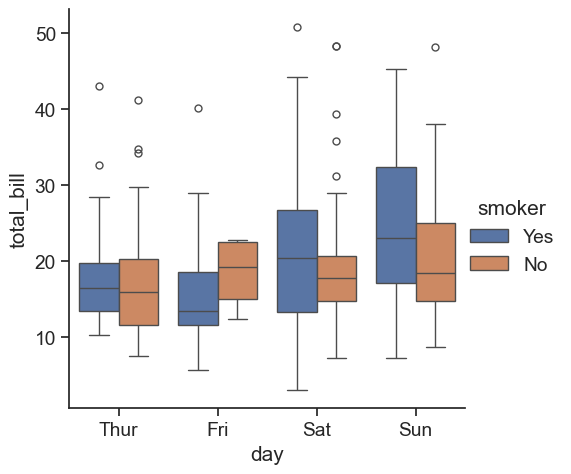

In [123]:
sns.catplot(data=tips, x="day", y="total_bill", hue="smoker", kind="box")

In [125]:
tips["weekend"] = tips["day"].isin(["Sat", "Sun"])

In [126]:
tips

total_bill   tip     sex smoker   day    time  size  weekend
0         16.99  1.01  Female     No   Sun  Dinner     2     True
1         10.34  1.66    Male     No   Sun  Dinner     3     True
2         21.01  3.50    Male     No   Sun  Dinner     3     True
3         23.68  3.31    Male     No   Sun  Dinner     2     True
4         24.59  3.61  Female     No   Sun  Dinner     4     True
..          ...   ...     ...    ...   ...     ...   ...      ...
239       29.03  5.92    Male     No   Sat  Dinner     3     True
240       27.18  2.00  Female    Yes   Sat  Dinner     2     True
241       22.67  2.00    Male    Yes   Sat  Dinner     2     True
242       17.82  1.75    Male     No   Sat  Dinner     2     True
243       18.78  3.00  Female     No  Thur  Dinner     2    False

[244 rows x 8 columns]

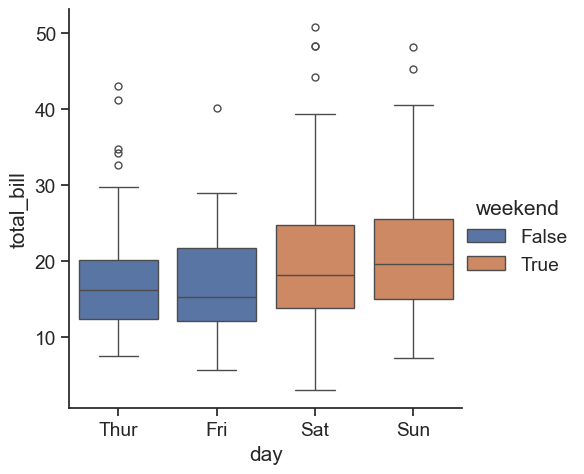

In [124]:
tips["weekend"] = tips["day"].isin(["Sat", "Sun"])
sns.catplot(data=tips, x="day", y="total_bill", hue="weekend", kind="box")

In [128]:
diamonds = sns.load_dataset("diamonds")

In [129]:
diamonds.sort_values("color")

carat        cut color clarity  depth  table  price     x     y     z
53939   0.75      Ideal     D     SI2   62.2   55.0   2757  5.83  5.87  3.64
7817    1.00  Very Good     D     SI2   63.5   59.0   4295  6.35  6.32  4.02
7816    1.00       Good     D     SI2   57.8   58.0   4295  6.61  6.55  3.80
7815    1.00  Very Good     D     SI2   61.5   63.0   4295  6.32  6.27  3.87
7809    0.56      Ideal     D      IF   61.9   57.0   4293  5.28  5.31  3.28
...      ...        ...   ...     ...    ...    ...    ...   ...   ...   ...
4861    1.00    Premium     J     SI1   60.8   58.0   3712  6.39  6.44  3.90
18421   1.52      Ideal     J     SI1   61.9   57.0   7491  7.37  7.33  4.55
18423   1.50  Very Good     J     VS2   62.6   58.0   7492  7.25  7.29  4.55
42108   0.65      Ideal     J     SI1   61.4   55.0   1276  5.58  5.62  3.44
14123   1.30      Ideal     J     SI1   61.5   55.0   5728  7.03  7.06  4.33

[53940 rows x 10 columns]

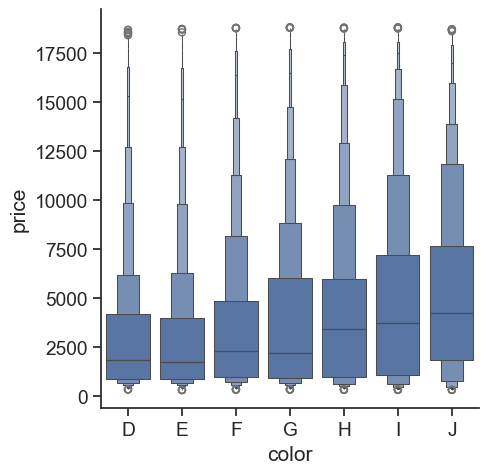

In [ ]:

sns.catplot(
    data=diamonds.sort_values("color"),
    x="color", y="price", kind="boxen",
)

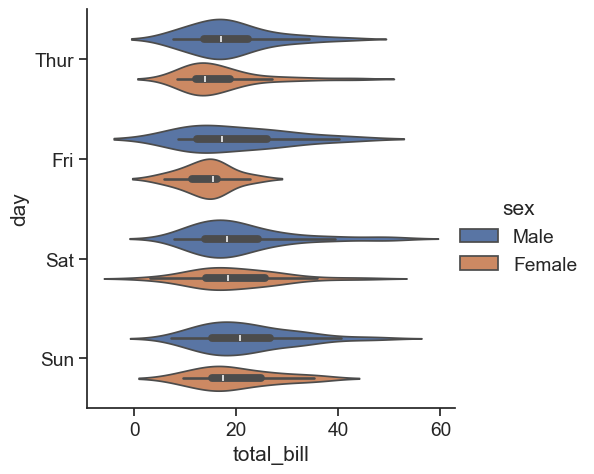

In [131]:
sns.catplot(
    data=tips, x="total_bill", y="day", hue="sex", kind="violin",
)

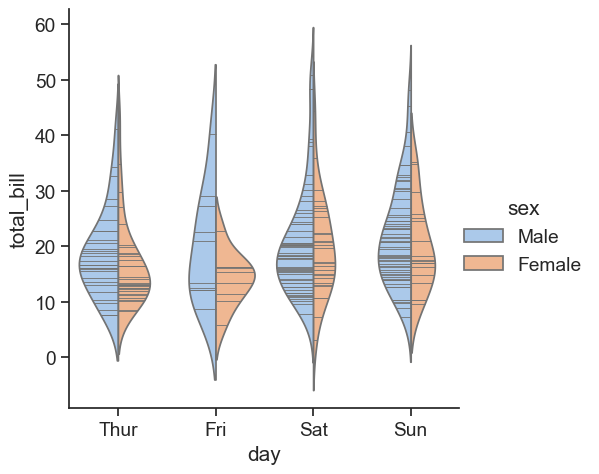

In [130]:
sns.catplot(
    data=tips, x="day", y="total_bill", hue="sex",
    kind="violin", inner="stick", split=True, palette="pastel",
)